#  Yulu Bikes Case study

### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

A high level overview of Yulu Case study

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not 
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    1. Clear, Few clouds, partly cloudy, partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

#### **Characterstics of the dataset**

* Data Preprocessing

* Outliers

* EDA (Univariate & Bivariate)

* Does Working day have an effect on number of electric cyles rented?

    * Two sampled T-Test

* Are number of cycles rented similar or different in different seasons?

    * Annova Test (one way)

* Are number of cycles rented similar or different in different weather conditions?

    * Annova Test (one way)

* Is Weather type dependent on the season?

    * Chi-Square test of Independence

* Final Conclusion

<br>
    
**Problem Description :**

The management at Yulu having suffered dips in its revenue wants to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the American market. The company also wants to know which variables describes the electric cycles demand.



In [1]:
# importing the necessery libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,t,ttest_ind,f_oneway,chi2_contingency,shapiro,levene,kruskal
from statsmodels.stats.weightstats import ztest

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
#sns.set_palette("bright")
# sns.set_style('whitegrid')

plt.style.use('default')

In [2]:
# importing the dataset
df=pd.read_csv('bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
# Checking the shape of data
df.shape

(10886, 12)

we have 10886 no of Row

In [4]:
# checking the Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# since the column season, holiday,working day and weather are categorical columns. in original dataset their datatype is int
# converting the datatype from int to object
# conversting the datetime to datetime obejct
catge_col=['season','holiday','workingday','weather']
df[catge_col]=df[catge_col].astype('object')
df['datetime']=pd.to_datetime(df['datetime'])

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


observation-
- Data type of each column is converted into correct dtype
- we have 10886 rows and 11 column in the dataset

In [7]:
# checking for the null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Observation- There are Null values in the dataset

In [8]:
# converting the season column with actual names
def Season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
df['season']=df['season'].apply(lambda x : Season(x))

In [9]:
# # converting the weather column with actual names
# def Weather(x):
#     if x==1:
#         return 'Clear+Few cloud'
#     elif x==2:
#         return 'Mist+Few cloud'
#     elif x==3:
#         return 'Light snow/Rain '
#     else:
#         return 'Heavy Rain / Thunder Storm '
    
# df['weather']=df['weather'].apply(lambda x : Weather(x))

In [10]:
# Extracting the dates and time From the datetime object for furthur analysis and adding it to the dataframe
df['Date']=df['datetime'].dt.strftime("%d-%m-%Y")
df['Time']=df['datetime'].dt.strftime("%H")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,01-01-2011,00
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,01-01-2011,01
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,01-01-2011,02
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,01-01-2011,03
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,01-01-2011,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,19-12-2012,19
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,19-12-2012,20
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,19-12-2012,21
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,19-12-2012,22


In [11]:
# checking the properties of the dataset
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,2011-01-01,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886,4,winter,2734,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,10886.0,2.0,0.0,10575.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,10886.0,2.0,1.0,7412.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,10886.0,4.0,1.0,7192.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,10886.0,NaN,NaN,NaN,NaT,NaT,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,NaT,NaT,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,NaT,NaT,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,NaT,NaT,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,NaT,NaT,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


Observations:-
- There are More users in winters.
- More users on Working days
- People tend to use bikes in clear or partly cloudy weather
- 75th percentile of users are less than 284 users
* The average number of users using Yulu in an hour is 191.5
* The median number of users is 145 per hour

This shows that the data has outliers since the average number of users surpasses the median number of users by a great margin

#############################################################################################################################

### Outlier detection

In [12]:
# crating a function to detect outliers in each column
def Outlier_detection(col_name,df=df):
    print()
    fig=plt.figure(figsize=(30,10))
    sns.boxplot(x=df[col_name])
    plt.title(col_name,fontsize=25)
    plt.xticks(fontsize=20)
    plt.show()

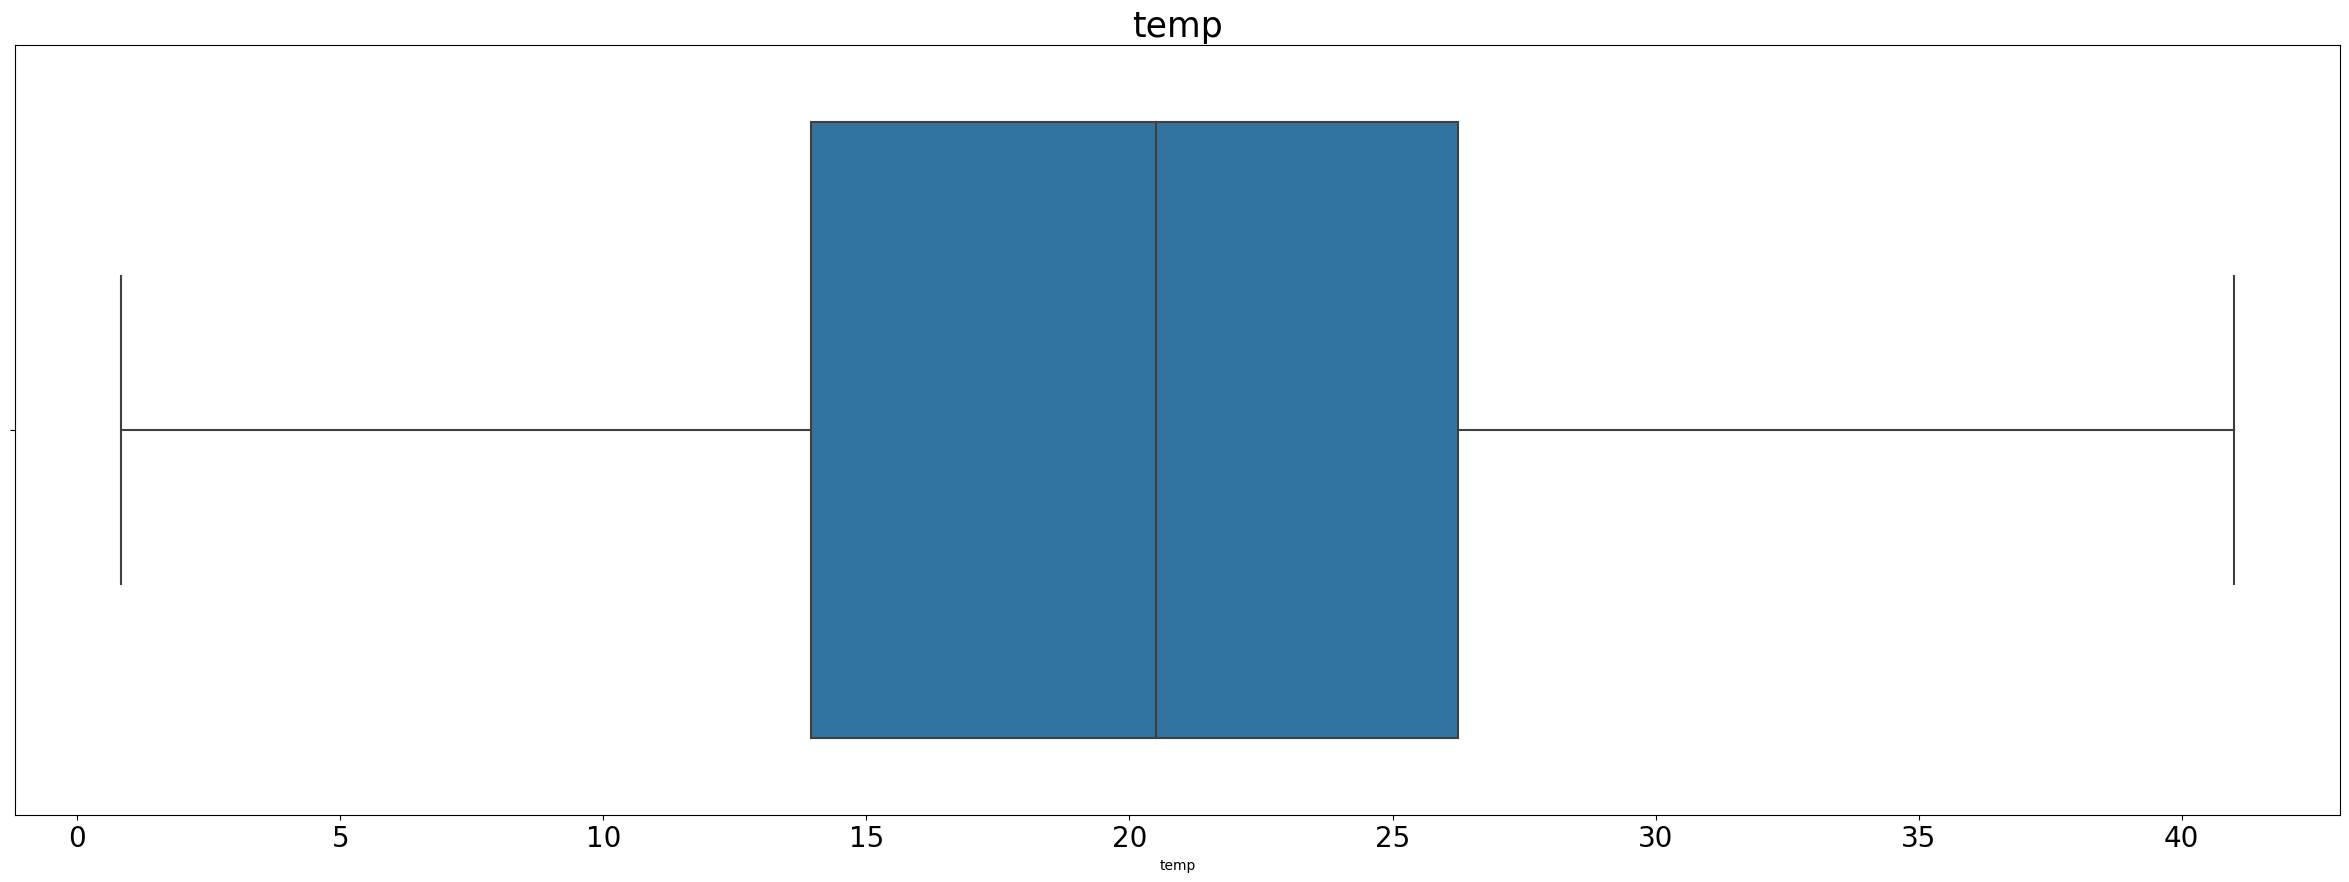

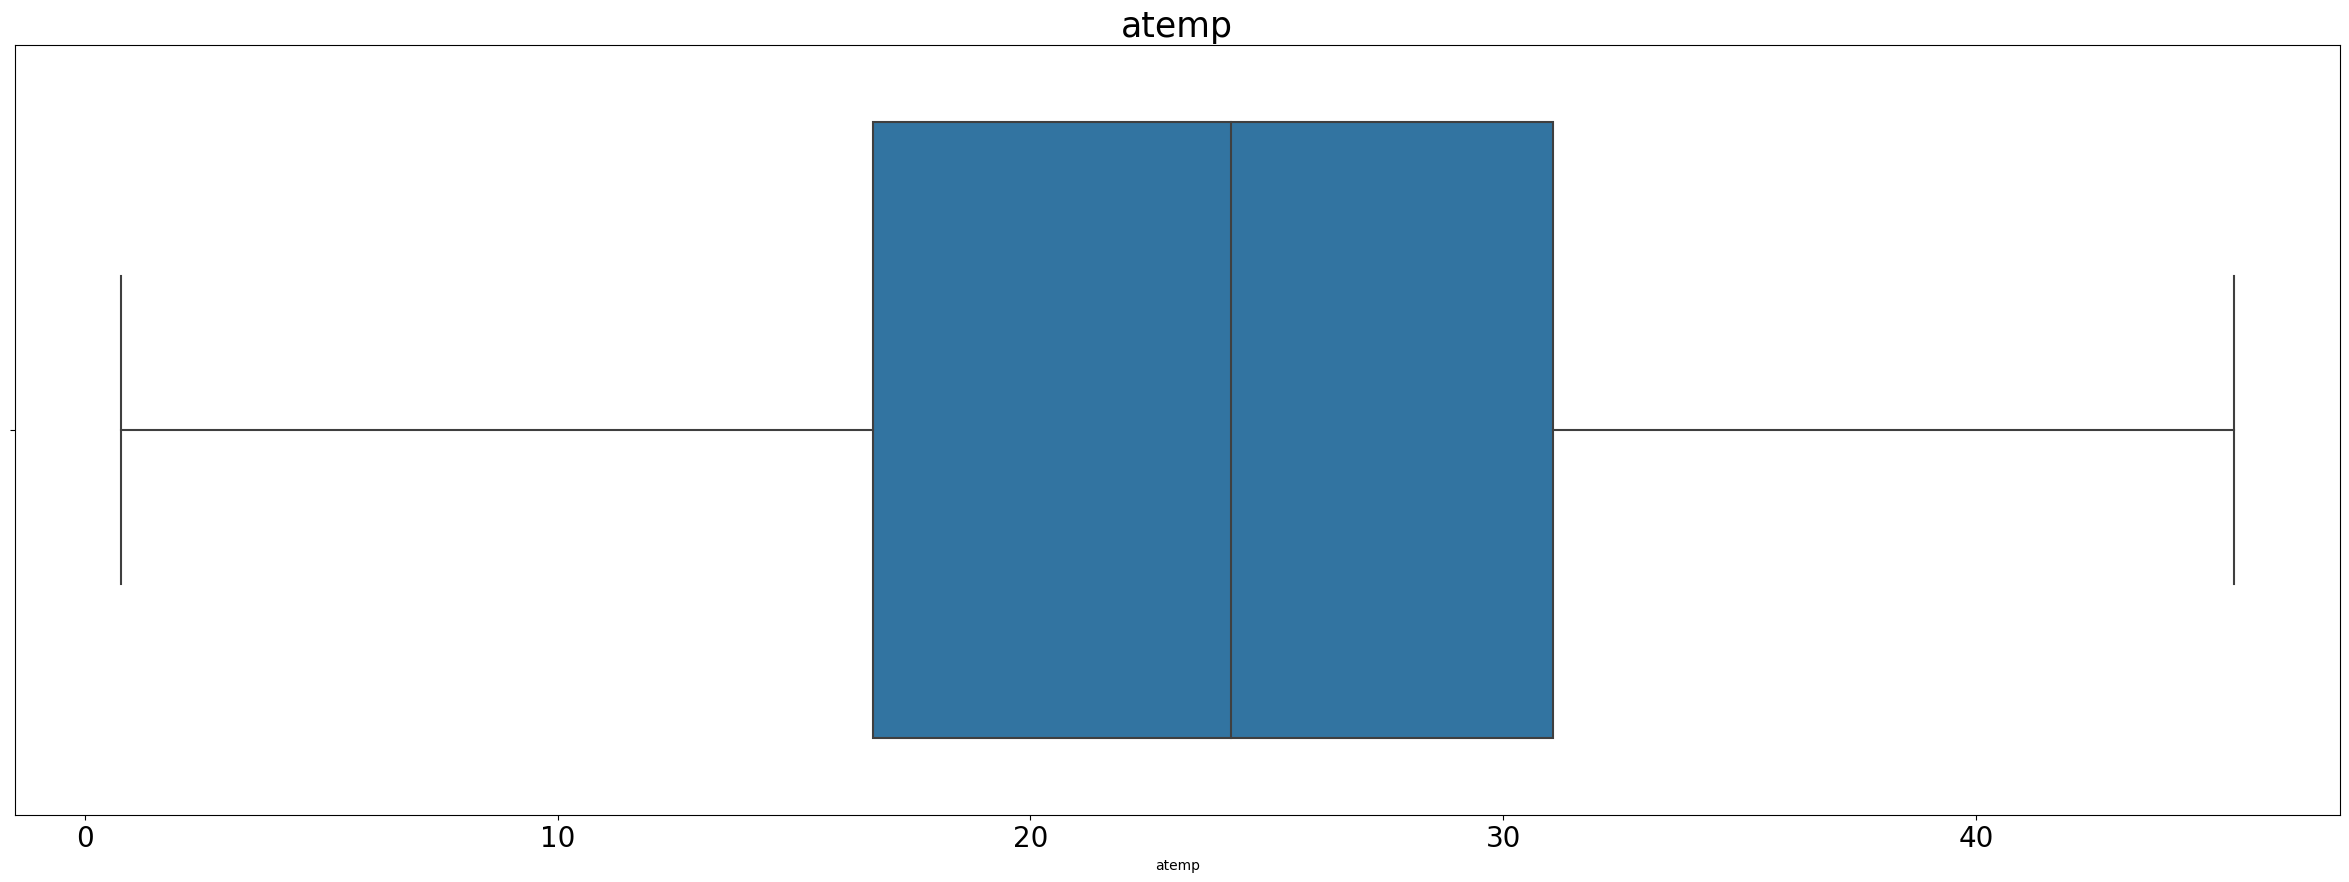

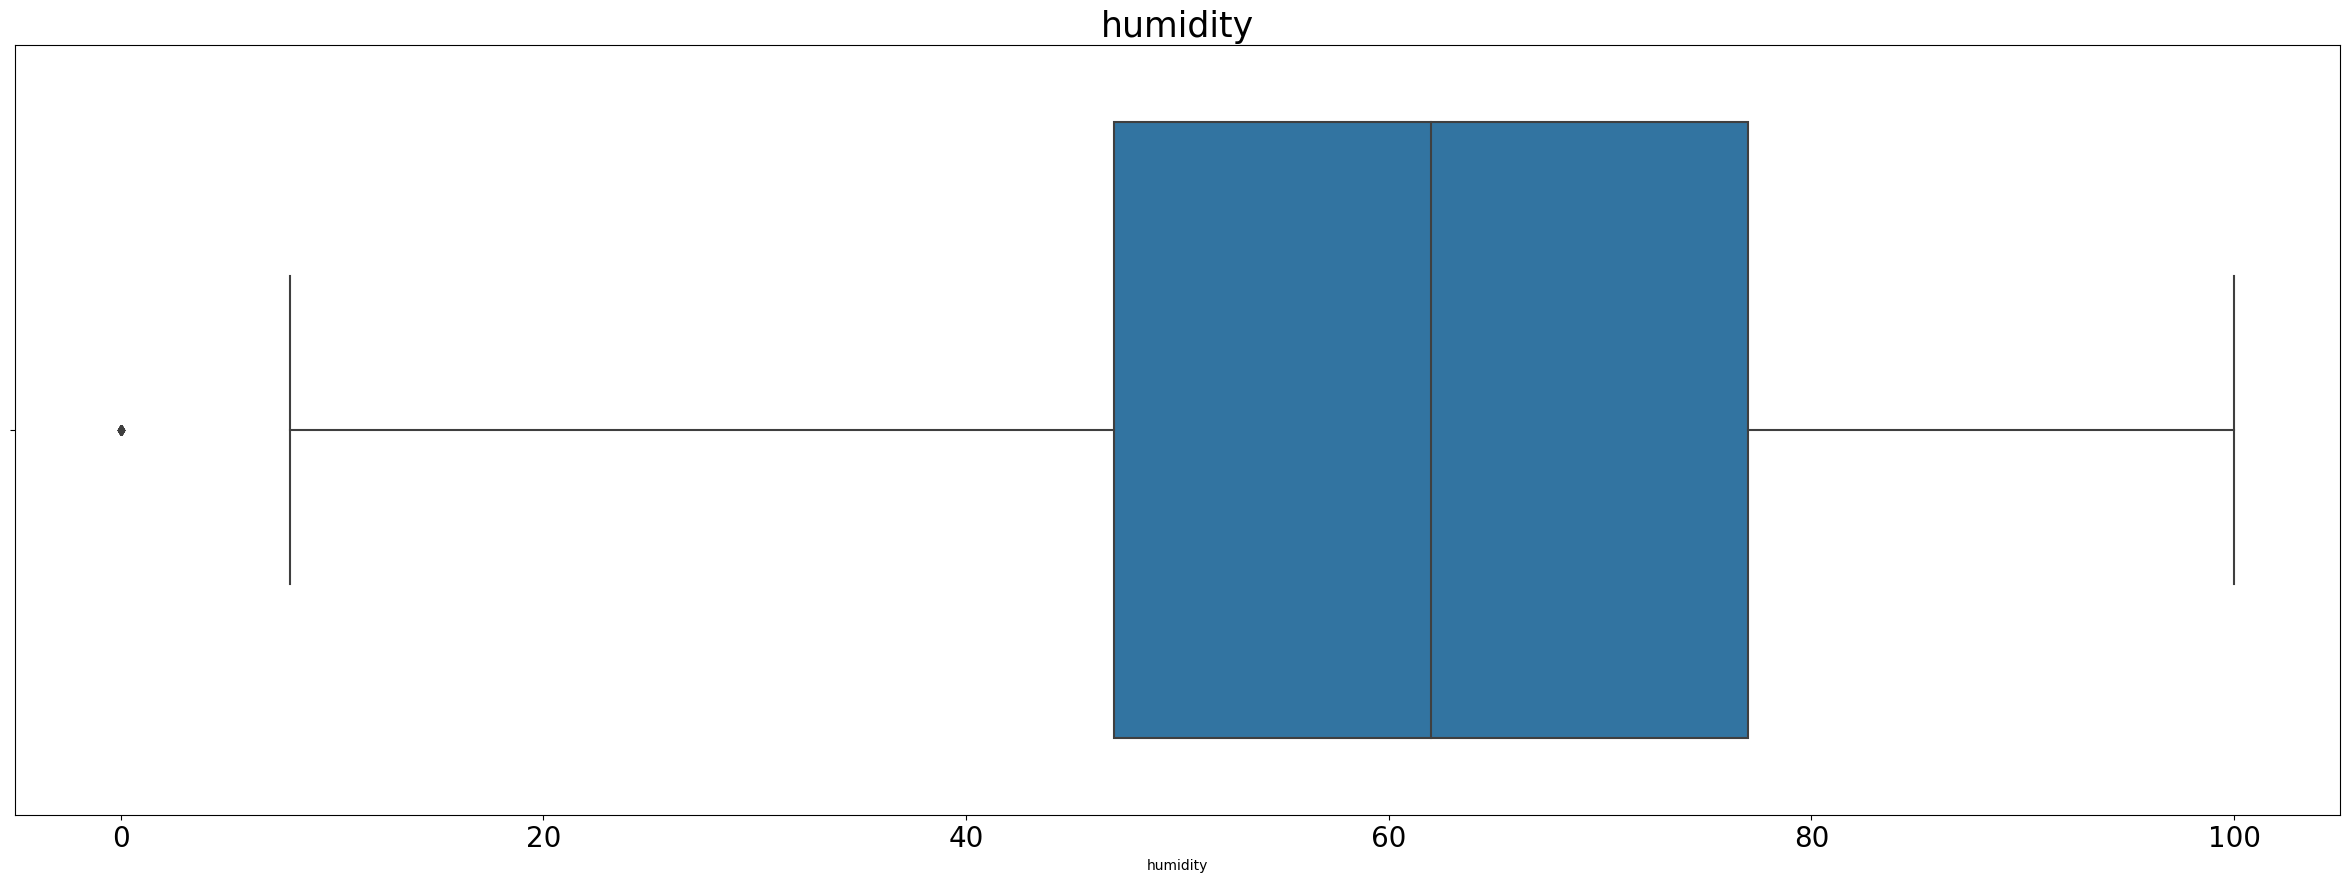

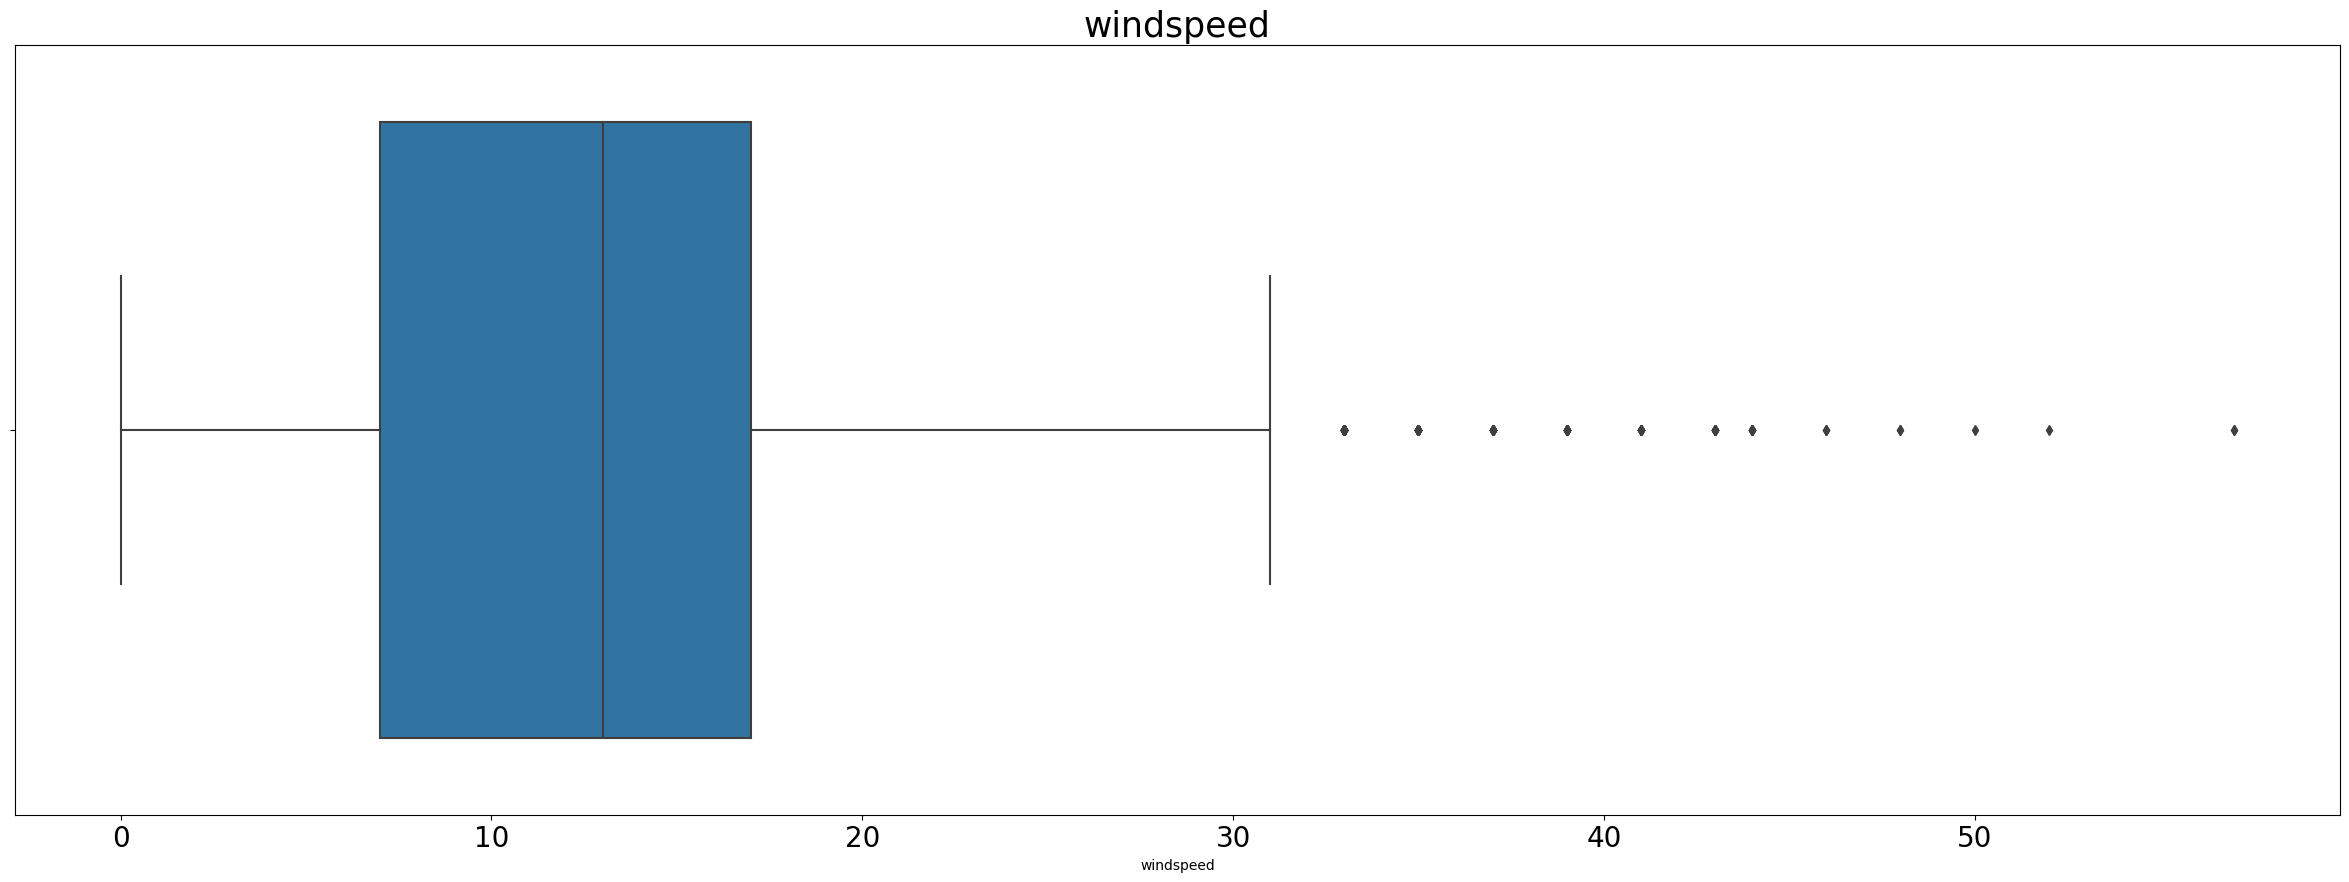

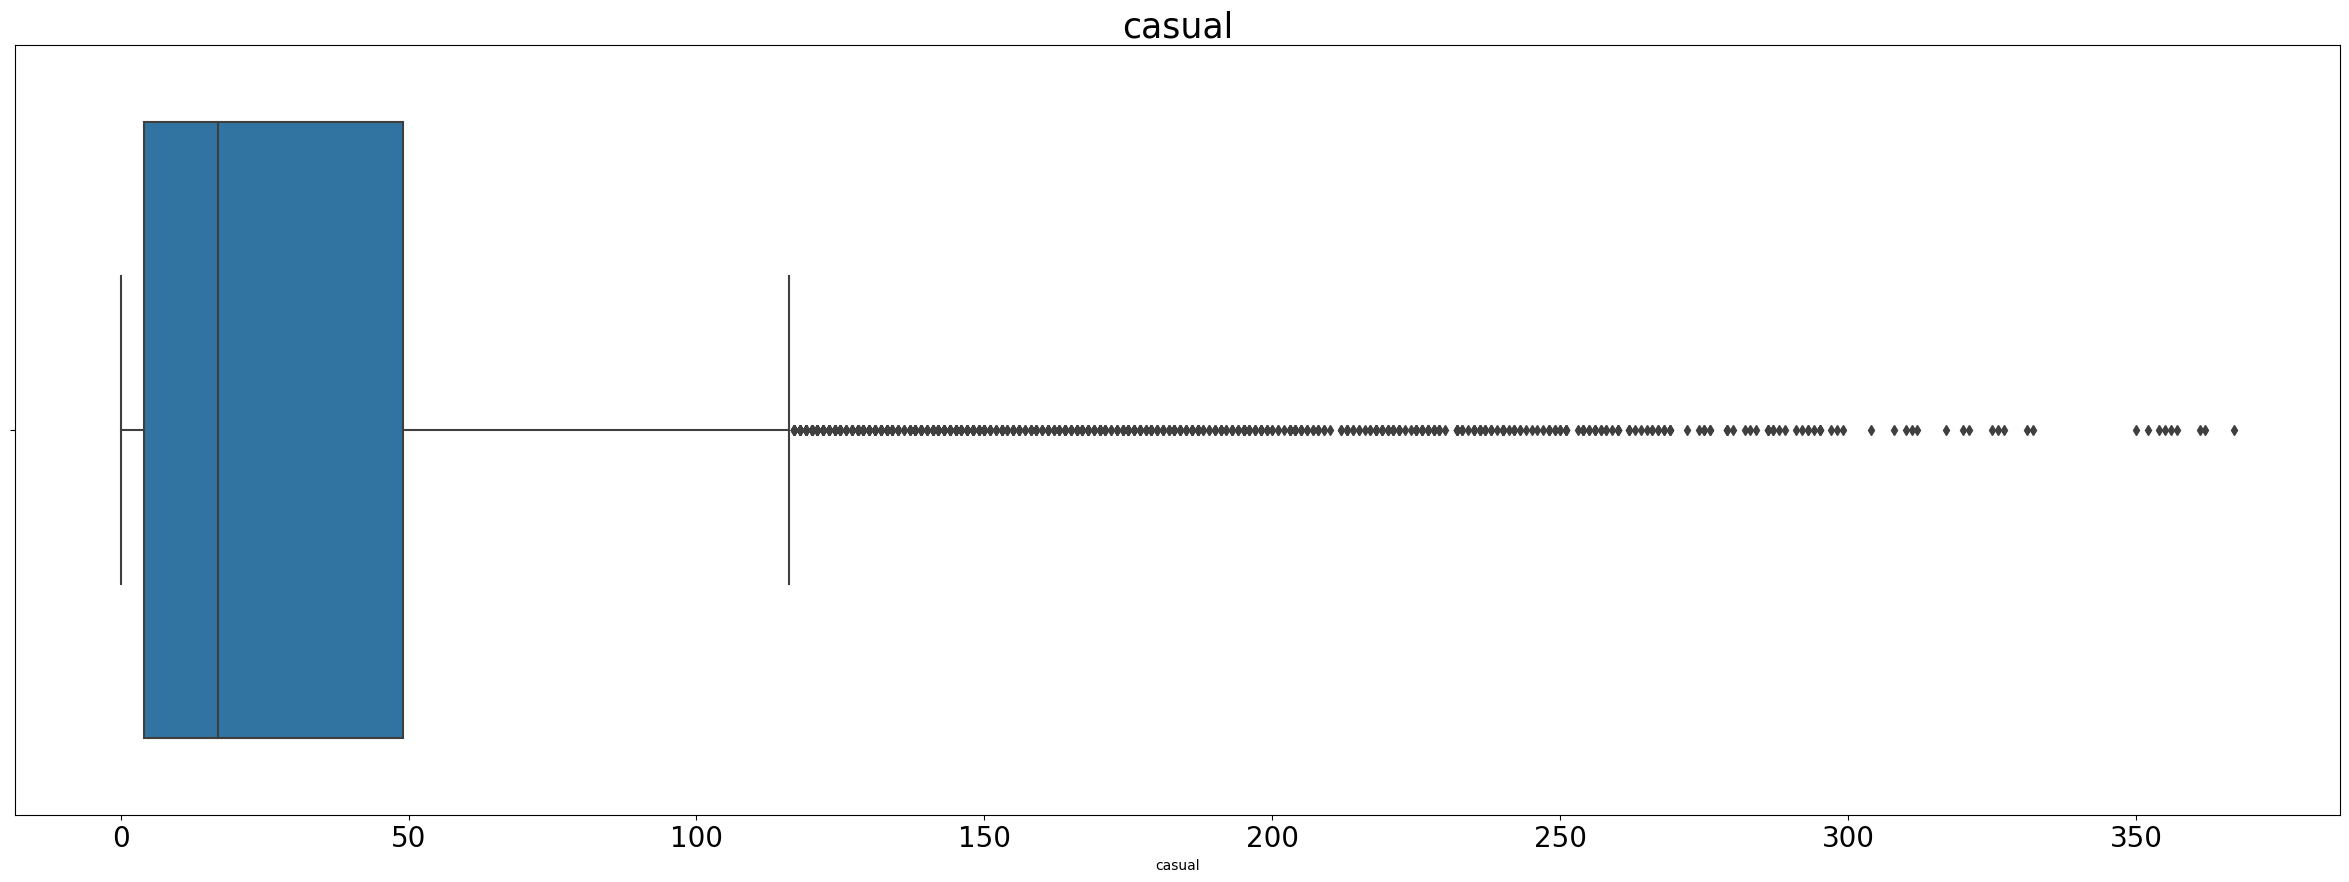

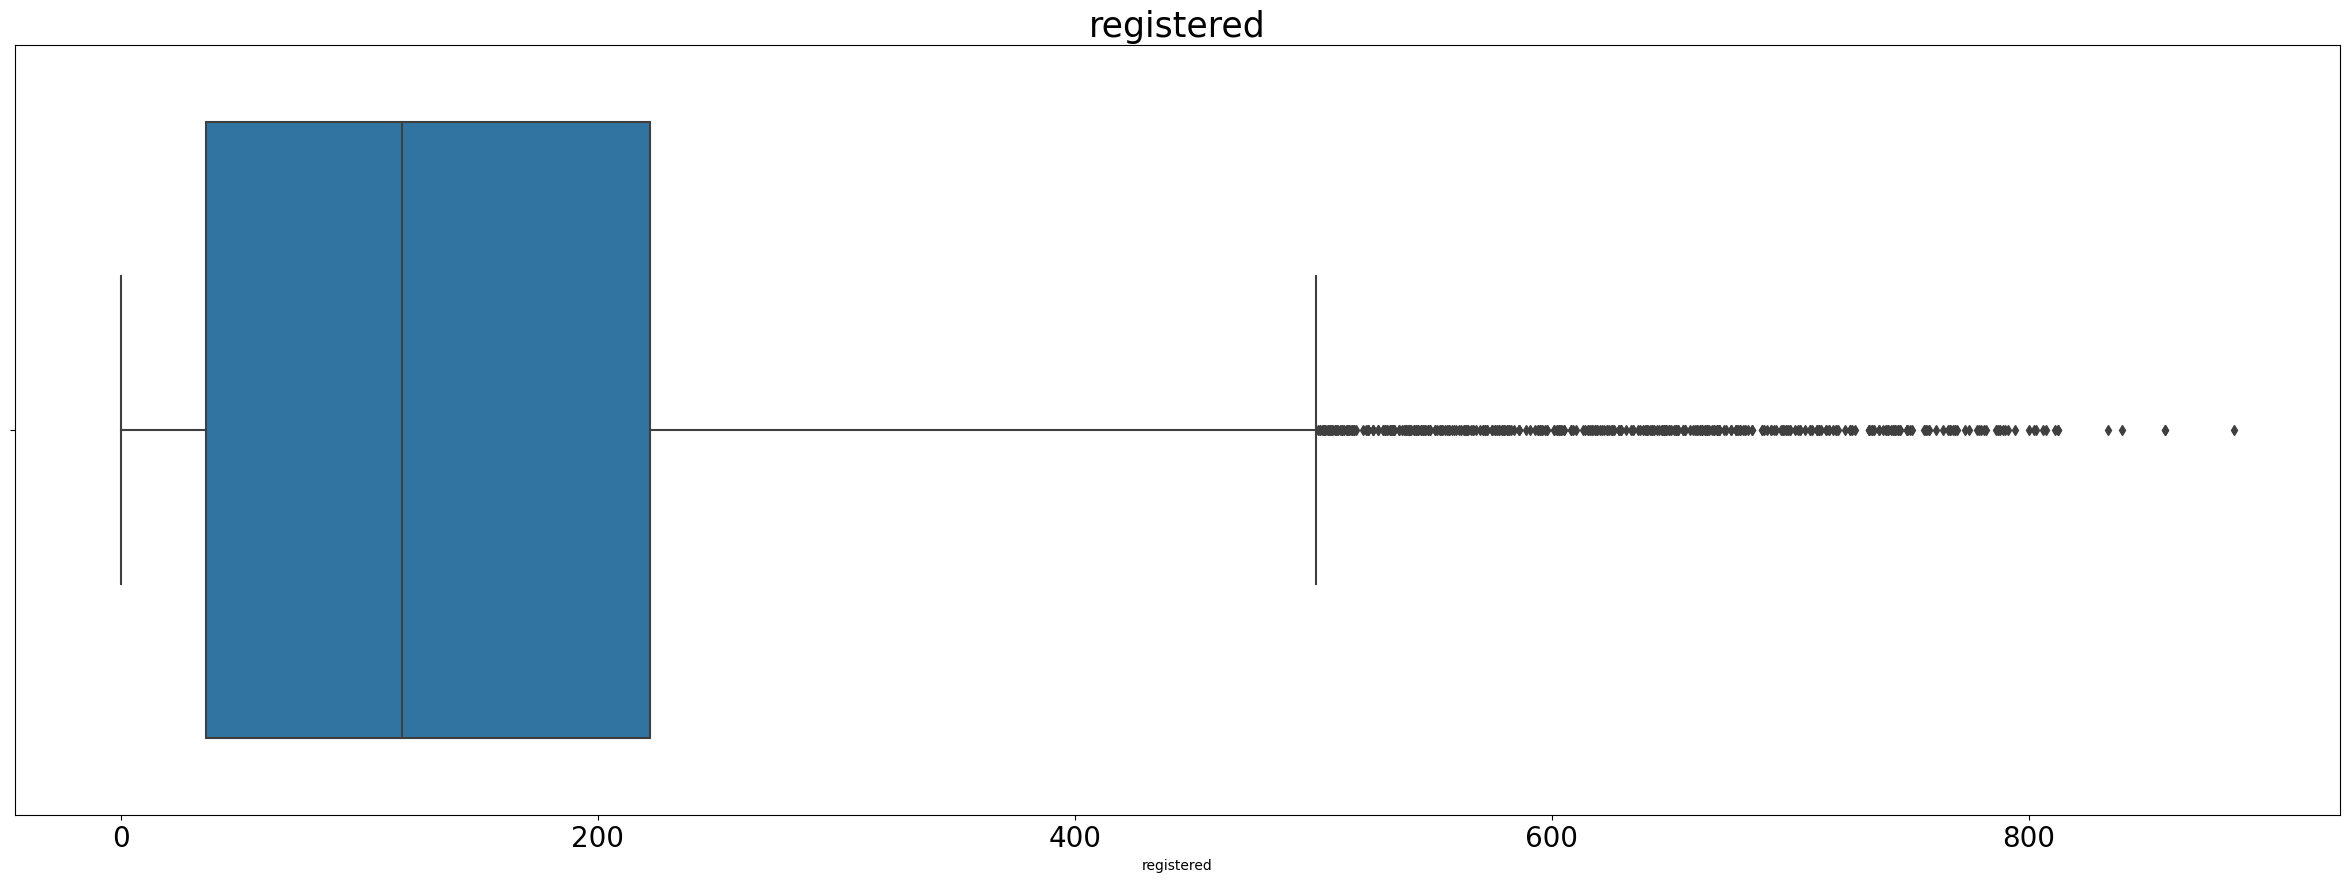

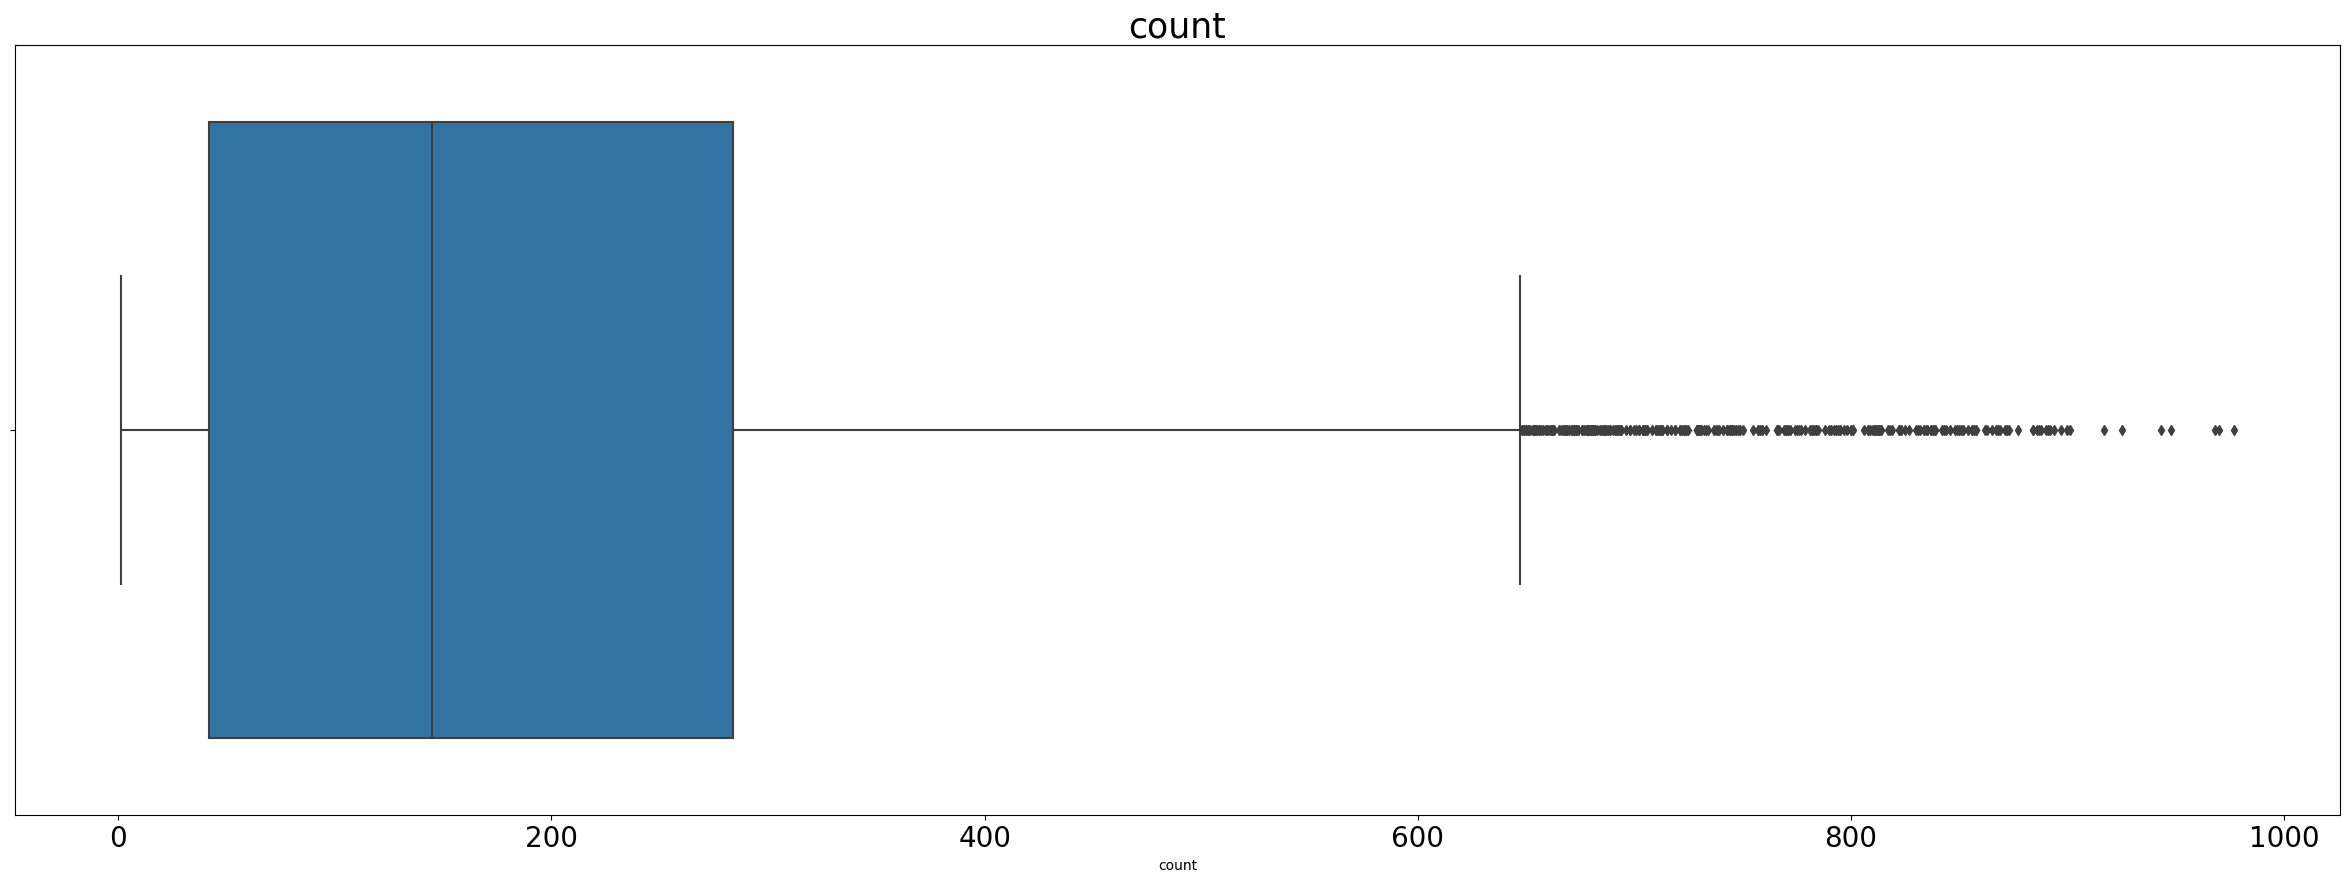

In [13]:
# for all continuous columns we plot the box plot and histogram
for i in df.select_dtypes(include='number').columns:
    Outlier_detection(i)

Observations:-
* `Temperature` - There are no outliers.
* `Humidity` - No outliers present in this column.
* `Wind speeed` - there are outliers present in wind speed respective to the season and weather.
* `Count` =  there are outliers present after 640 in count column 

# Univariate Analysis

In [14]:
# crating a function to detect Histplot in each column
def histogram(col_name,df=df):
    sns.histplot(x=df[col_name],kde=True)
    plt.axvline(x=df[col_name].mean(),color='Orange',linestyle='--',linewidth=1.5,label='Mean')
    plt.axvline(x=df[col_name].median(),color='red',linestyle='-',linewidth=1.5,label='Median')
    plt.axvline(x=df[col_name].mode()[0],color='yellow',linestyle='--',linewidth=1.5,label='Mode')
    plt.legend()
    plt.title(col_name,fontsize=20)

    plt.show()

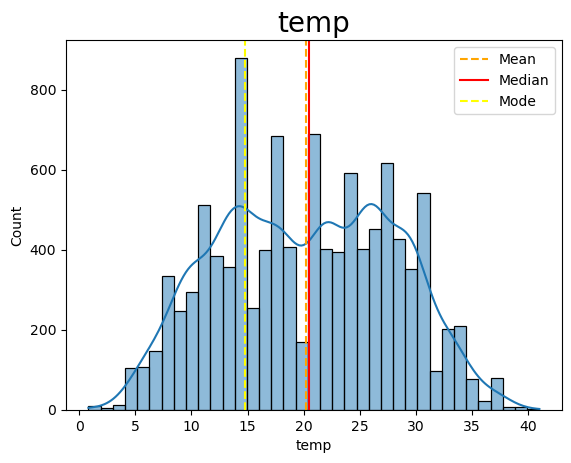

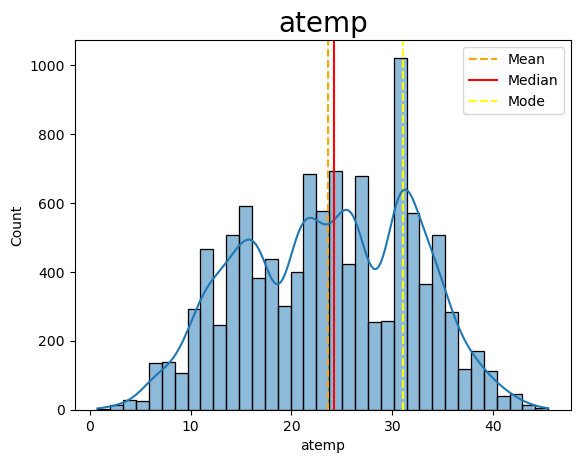

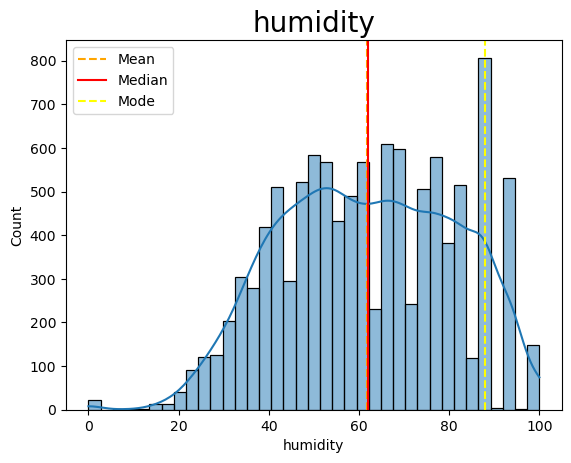

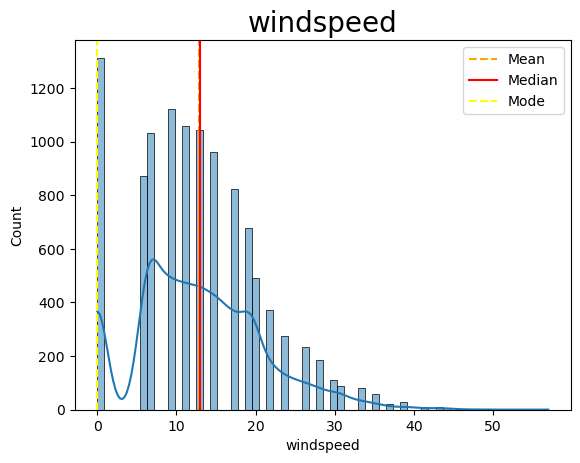

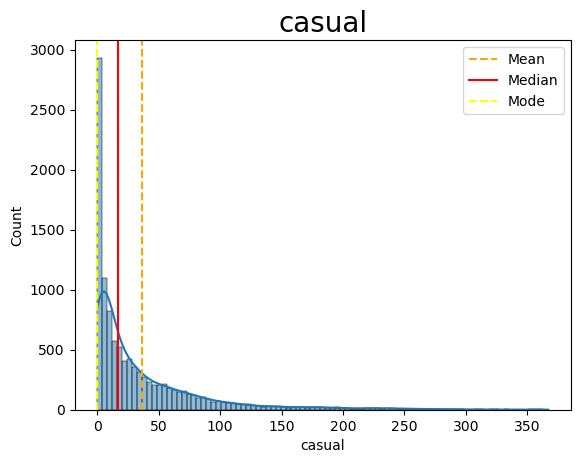

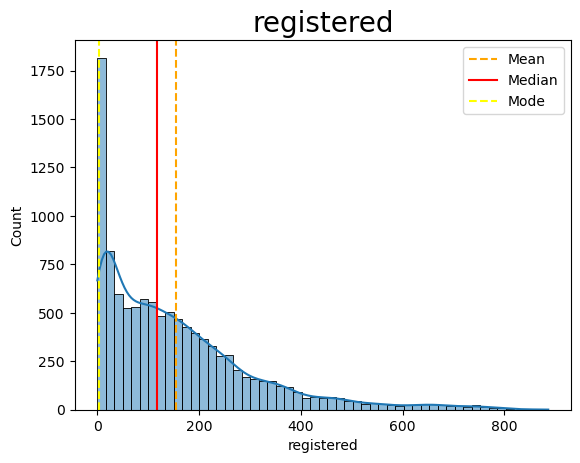

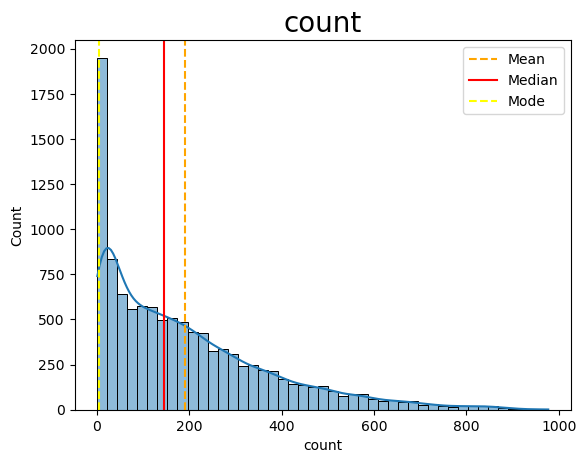

In [15]:
# for all continuous columns we plot the histogram
for i in df.select_dtypes(include='number').columns:
    histogram(i)

- `Temp` - distribution of is symmetric and so mean and median both are almost equal = 24
- `Humidity` - distribution of is symmetric and so mean and median both are almost equal = 64
- `Windspeed` - the histplot of wind speed is right skewed and mean a little high then median.
- `Count`- the plot shows the right skewed and shows there are outliers present and mean is very high than median. as the      outliers present right side of the company that suggest the good thing that people tend to rent more and more as the time passed

In [16]:
# crating a function to detect Histplot in each column
def countplot(col_name,df=df):
    sns.countplot(x=df[col_name])
    plt.title(col_name,fontsize=20)
    plt.xticks(rotation=90)
    plt.show()

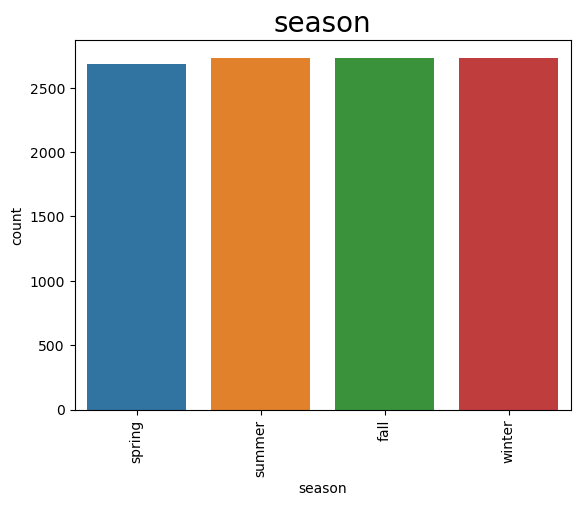

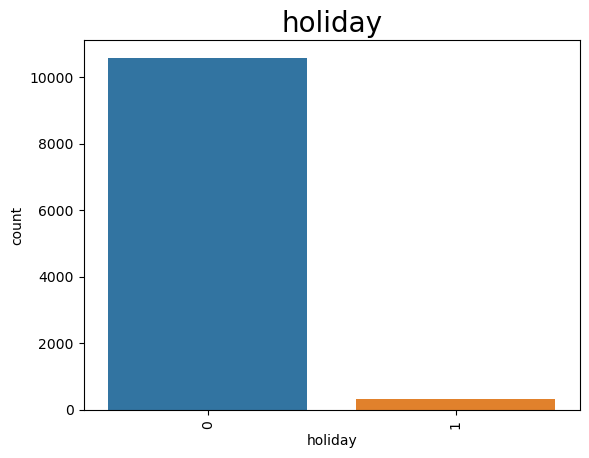

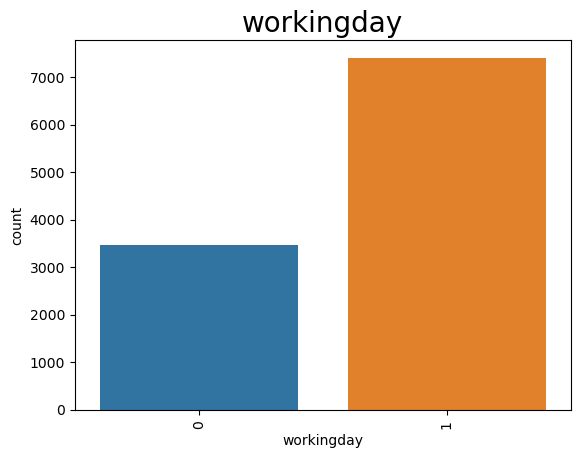

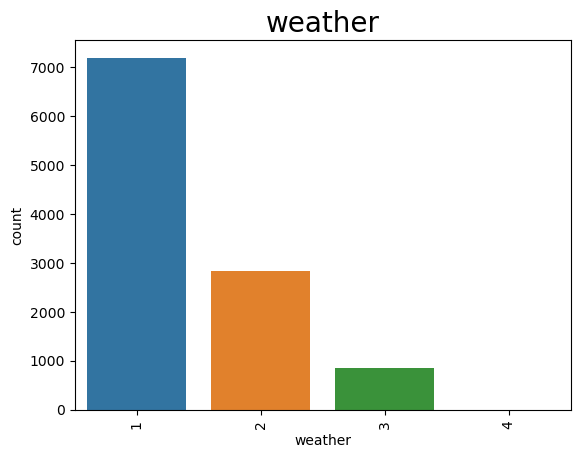

In [17]:
for i in df.select_dtypes(include='object').columns[:4]:
    countplot(i)

Observation:-
   - Rental users are almost equally distributed weathers
   - Rental is way high in holidays than in non holidays
   - Customer do rent bikes more in working days then weekends
   - if weather is clear or or little cloudy the customer tend to rent bikes more.

#  Bivariate Analysis

In [18]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,01-01-2011,00
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,01-01-2011,01
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,01-01-2011,02
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,01-01-2011,03
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,01-01-2011,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,19-12-2012,19
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,19-12-2012,20
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,19-12-2012,21
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,19-12-2012,22


### Checking the Effect of Season on rented users
### Season VS Count

In [19]:
# Sum of no of rented users per season
df.groupby('season')['count'].sum().reset_index()

,season,count
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


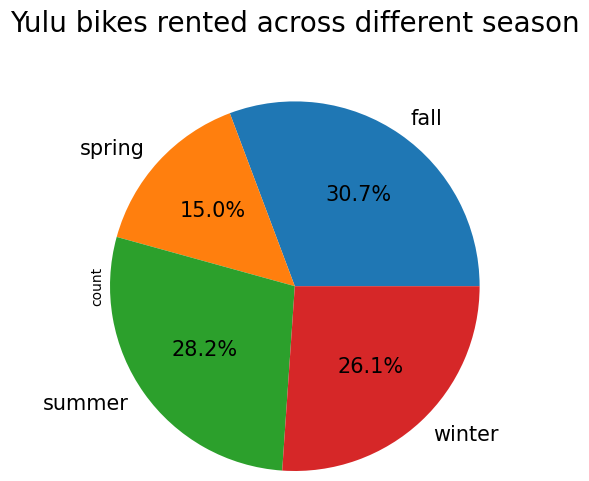

In [20]:
df.groupby('season')['count'].sum().plot(kind='pie',autopct='%1.1f%%',radius=1.25,textprops={'fontsize':15})
plt.title("Yulu bikes rented across different season",pad=50,fontsize=20)
plt.show()

Observation:-
 1. Most no of rented bikes are in fall season and then summer season.


******************************************************************************************************


### Checking the Effect of Weather on rented users
   ###### Weather VS Count

In [21]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [22]:
# Sum of no of rented users per season
df.groupby('weather')['count'].sum().reset_index()

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


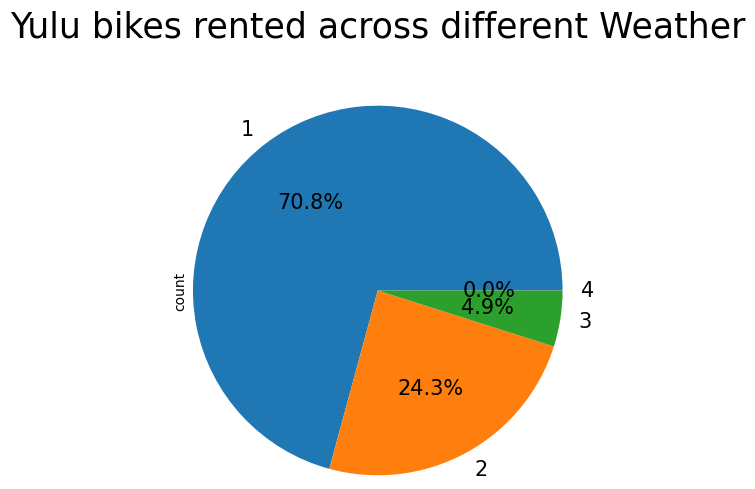

In [23]:
df.groupby('weather')['count'].sum().plot(kind='pie',autopct='%1.1f%%',radius=1.25,textprops={'fontsize':15})
plt.title("Yulu bikes rented across different Weather",pad=50,fontsize=25)
plt.show()

Observation:-
   - Clear, Few clouds, partly cloudy, partly cloudy  attracts the most rented users. = 71%
   - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather with 2nd most = 25%
   - For heavy rain we have only one data so its not possible to conclude


******************************************************************************************************


### Checking the Effect of Holidays on rented users

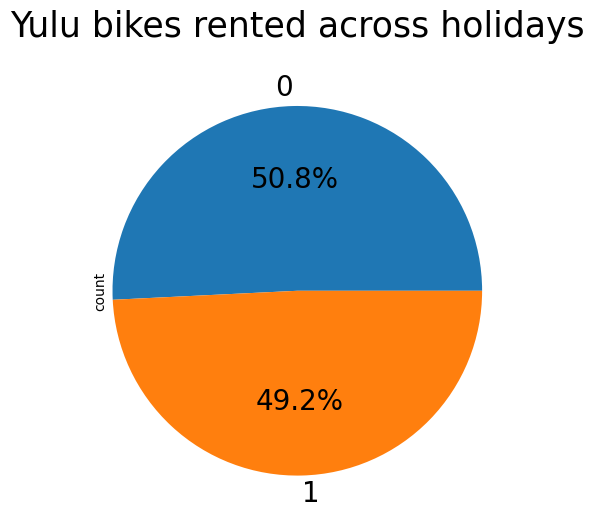

In [24]:
df.groupby('holiday')['count'].mean().plot(kind='pie',autopct='%1.1f%%',radius=1.25,textprops={'fontsize':20})
plt.title("Yulu bikes rented across holidays",pad=50,fontsize=25)
plt.show()

 Average mean bikes rented on holiday and Not holiday are almost same


******************************************************************************************************


### Checking the Effect of working and weekends on rented users

In [25]:
# Adding a Day column in dataset
df['Day']=df['datetime'].dt.day_name()

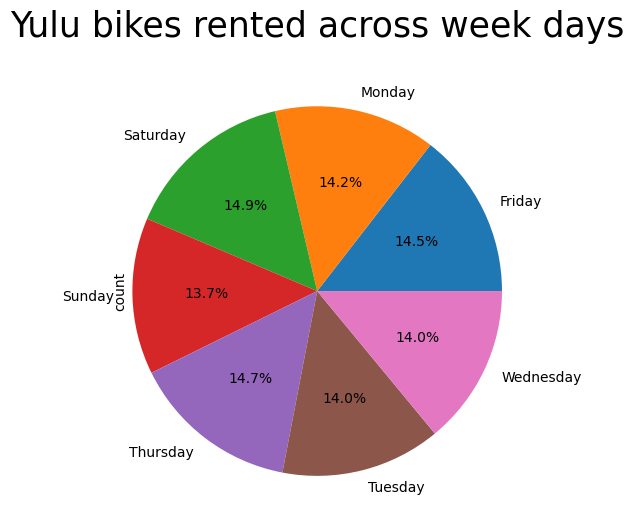

In [26]:
df.groupby('Day')['count'].sum().plot(kind='pie',autopct='%1.1f%%',radius=1.25,textprops={'fontsize':10})
plt.title("Yulu bikes rented across week days",pad=50,fontsize=25)
plt.show()

the distribution of rented bikes is almost Equal W.R.T to day


******************************************************************************************************


### Effect of windspeed for renting bike users

In [27]:
# converting windspeed into wind category 
df['wind_category']=pd.cut(df['windspeed'],bins=[-1,10,20,30,40,60],labels=['<10','10-20','20-30','30-40','40-60'])

In [28]:
df.groupby('wind_category')['count'].sum()

wind_category
<10       712814
10-20    1062399
20-30     223899
30-40      79889
40-60       6475
Name: count, dtype: int64

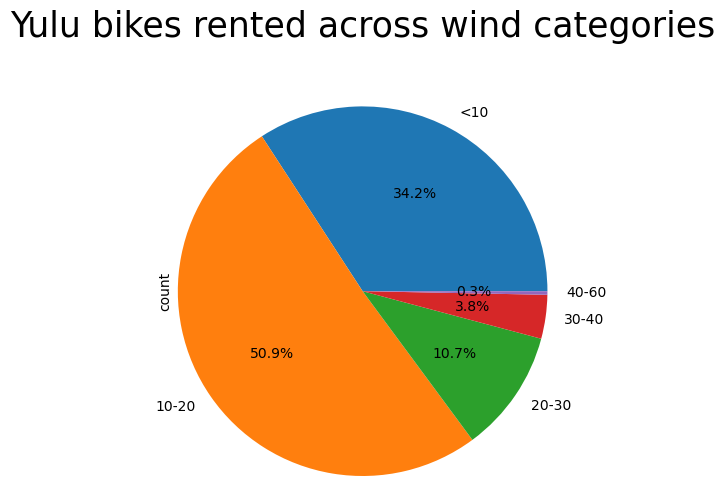

In [29]:
df.groupby('wind_category')['count'].sum().plot(kind='pie',autopct='%1.1f%%',radius=1.25,textprops={'fontsize':10})
plt.title("Yulu bikes rented across wind categories",pad=50,fontsize=25)
plt.show()

1. Almost 50% of bike rental happens in wind speed 10-20 kmph range.
2. almost 85% of bike rental are below the speed 20 kmph.


******************************************************************************************************



******************************************************************************************************


# Hypothesis testing

# Does Working Day has effect on number of electric cycles rented

for answering this question we will set up our null and alternate hypothesis
> * H0= Working Day has effect on number of electric cycles rented
> * Ha= Working Day has no effect on number of electric cycles rented

For this hypothesis test we will use **2-Sample T test**


**Assumptions for Two_Sample T test**:-
1. `Independence` - With independent simple random samples, each possible pair of samples (one from one population and one from the other) is equally likely to be the pair of samples selected
2. `Random samples` - Random sampling should be done for both populations
3. `Normal Population`- Both Population should be normally distributed or Sample should be large Enough
4. `Equal Variance ` - Checking for the Equality of Variance is variance of population is Equal then we will use pooled t test otherwise Welch's T test.

In [30]:
# we will collect sample from both population

working_day_sample=np.random.choice(df.loc[df['workingday']==0]['count'],size=500)
nonworking_day_sample=np.random.choice(df.loc[df['workingday']==1]['count'],size=500)

> For conducting the above experiment we will do random sampling from Working Day and non Working day population. -- `Assumption 2 ✅`

> Sampling is done independently - `Assumption 1 ✅`

<br>

<br>

## Now we have to check for normality and equal variance

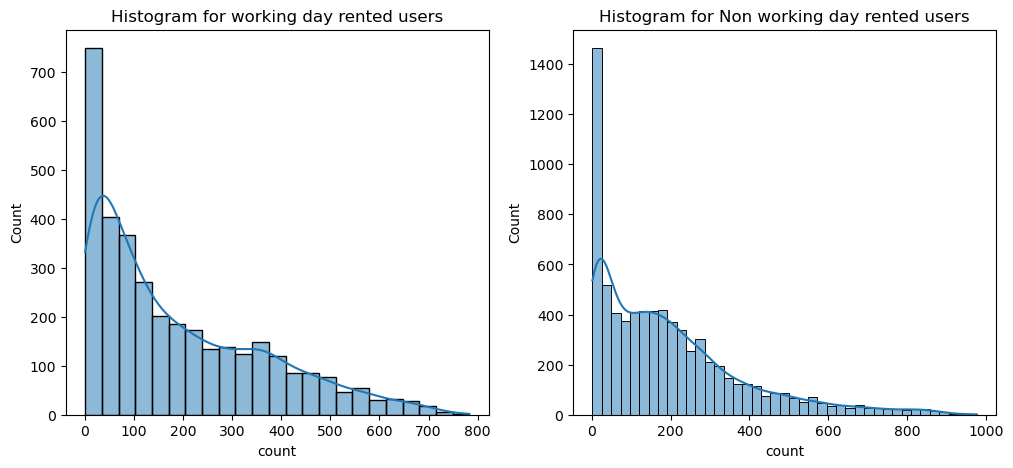

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df.loc[df['workingday']==0]['count'],kde=True)
plt.title('Histogram for working day rented users')
plt.subplot(1,2,2)
sns.histplot(df.loc[df['workingday']==1]['count'],kde=True)
plt.title('Histogram for Non working day rented users')
plt.show()

- From the Histogram the distribution of population is right skewed and **NOT Normal** 
- we will check the normality of population from QQ plot and shapiro- wilk test 

### QQ plot for checking the normality 
we will QQ plot for both Working day sample and non working day sample if most of the points lie on the one side then we will consider the population to be normal

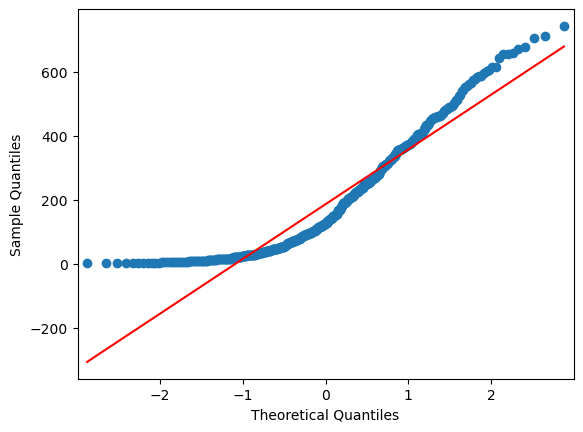

In [32]:
# Checking for normality of working day population
sm.qqplot(working_day_sample,line='s')
plt.show()

* `Conclusion` - as most of the points are not in a line we can not conclude the population to be normal for working day population

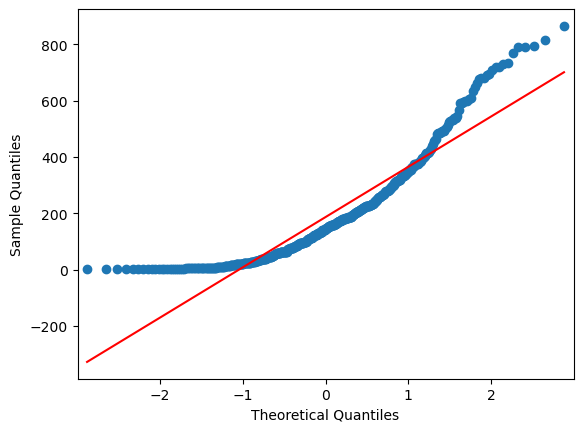

In [33]:
# Checking for normality of non working day population
sm.qqplot(nonworking_day_sample,line='s')
plt.show()

* `Conclusion` =as most of the points are not in a line we can not conclude the population to be normal for non working day population



******************************************************************************************************


###  we will do the Shapiro–Wilk test as it is the Quantitative approach for checking the normality

 #### Checking the normality for **working day populaiton** 
   * -- We will select the Null Hypothesis and alternate Hypothesis
      * H0 = The workday population is normally distributed
      * Ha = The workday population is not normally distributed
      

* we will select the significance level (alpha)=5%

In [34]:
shapiro(working_day_sample)

ShapiroResult(statistic=0.8859480619430542, pvalue=9.155228815882316e-19)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that working day Population is not normally distributed.


******************************************************************************************************


 #### Checking the normality for **non working day populaiton** 
   * -- We will select the Null Hypothesis and alternate Hypothesis
      * H0 = The non workday population is normal
      * Ha = The non workday population is not normal
      

* we will select the significance level (alpha)=5%

In [35]:
shapiro(nonworking_day_sample)

ShapiroResult(statistic=0.862153172492981, pvalue=1.4480404083503093e-20)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that non working day Population is not normally distributed.

#### Since the both the population are not normally distributed -- `Assumption 3 ❌`
#### then we will take the large sample size for accuracy of the result = 500


******************************************************************************************************


### Checking of Equality of variance of two Population by samples and  levene’s test

In [36]:
# Standard deviation for working day sample 
working_sample_SD=np.std(working_day_sample)
working_sample_SD

171.23946395618037

In [37]:
# Standard deviation for non working day sample 
nonworking_sample_SD=np.std(nonworking_day_sample)
nonworking_sample_SD

178.6367555795839

In [38]:
f' Ratio for nonworking_sample_SD/working_day_Sample_SD = {nonworking_sample_SD/working_sample_SD} is less than 2'

' Ratio for nonworking_sample_SD/working_day_Sample_SD = 1.0431985212549864 is less than 2'

Since the ratio is less than 2 then we can assume the population variance to be equal.

### We will confirm the equivalence for the variance from the levene's test

 ###### Checking for equality of variacne **non working day populaiton  and working day population** 
 
 The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
   *  We will select the Null Hypothesis and alternate Hypothesis
      * H0 = The variance for the non working day and working day population are equal
      * Ha = The variance for the non working day and working day population are  not equal
      

* we will select the significance level (alpha)=5%

In [39]:
# conducting the test
# we will use center as median beacause the samples are not normal they are right skewed
levene(working_day_sample,nonworking_day_sample,center='median')

LeveneResult(statistic=0.31844342319906344, pvalue=0.5726713918119275)

`Conclusion` :-

* from the about results we find the p value for this is test is higher than significance level.

* results are not statistically significant. thus we fail to reject the Null hypothesis i.e. `The variance for the non working day and working day population are equal` so we do not have enough data to reject the null hypothesis

* we conclude the `The variance for the non working day and working day population are equal` for now 
### `Assumption 4 ✅`

**3 Out of 4 assumptions ar correctly found now we will perform the 2 sample t test**

## performing the two sample T test
  assuming significance level = 5% and setting up the null Hypothesis
   * H0 = day type (Working day or non working day) does not effect on the no of cycle rented ( the Mean of sum of rented bikes on working day = Mean of sum of rented bikes on  non working day)
   * Ha = day type (Working day or non working day) does  effect on the no of cycle rented ( the Mean of sum of rented bikes on working day != Mean of sum of rented bikes on  non working day)

In [40]:
ttest_ind(working_day_sample,nonworking_day_sample)

Ttest_indResult(statistic=-0.05470492467601393, pvalue=0.9563844947853967)

`Conclusion:-`
1. since from the above results the 0.533(pvalue) > 0.05(significance level)  the We fail to reject the Null hypothesis.
## We do have sufficient evidence to conclude that there is no effect of day Type on the no of cyclce rented


******************************************************************************************************



******************************************************************************************************


# Does Number of rented cycles is impacted by the various different seasons

**Due to the fact that there are four levels to take into account, one variable We use the ANNOVA test for this kind of analysis**

   * ANNOVA - Analysis of variance ANNOVA, which offers techniques for comparing the means of more than two populations.
   * There are four levels total. Summer/fall/winter/spring.
   * By testing, we will determine whether the season has no impact on renting cycles or at least one season has an impact.
   
   
  **Assumption of ANOVA Test**:-
  
      1.The responses for each factor level have a normal population distribution.
      2.These distributions have the same variance.
      3.Independent Samples.
      4.Simple random sampling


In [41]:
# Extrating the population data
spring_data=df.loc[df['season']=='spring']['count']
fall_data=df.loc[df['season']=='fall']['count']
summer_data=df.loc[df['season']=='summer']['count']
winter_data=df.loc[df['season']=='winter']['count']

In [42]:
# taking the independent and random samples
spring_sample=np.random.choice(spring_data,size=500)
fall_sample=np.random.choice(fall_data,size=500)
summer_sample=np.random.choice(summer_data,size=500)
winter_sample=np.random.choice(winter_data,size=500)

1. The Sampled data is Random = Assumption 4 ✅
2. The Sampled data is Independent = Assumption 3 ✅

- now we will check for the normality 

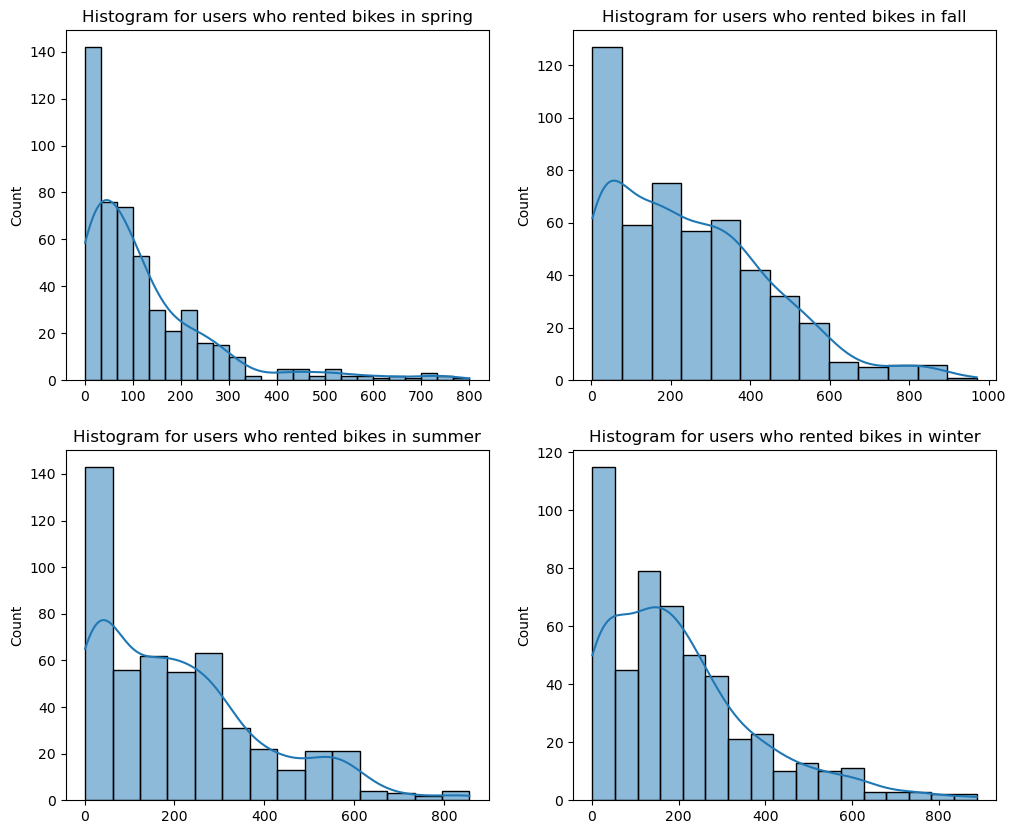

In [43]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(spring_sample,kde=True)
plt.title('Histogram for users who rented bikes in spring')
plt.subplot(2,2,2)
sns.histplot(fall_sample,kde=True)
plt.title('Histogram for users who rented bikes in fall')
plt.subplot(2,2,3)
sns.histplot(summer_sample,kde=True)
plt.title('Histogram for users who rented bikes in summer')
plt.subplot(2,2,4)
sns.histplot(winter_sample,kde=True)
plt.title('Histogram for users who rented bikes in winter')
plt.show()

The plot appears to be right-skewed since it is impossible to infer normality from the histogram.
### we are converting this data check log normal distribution

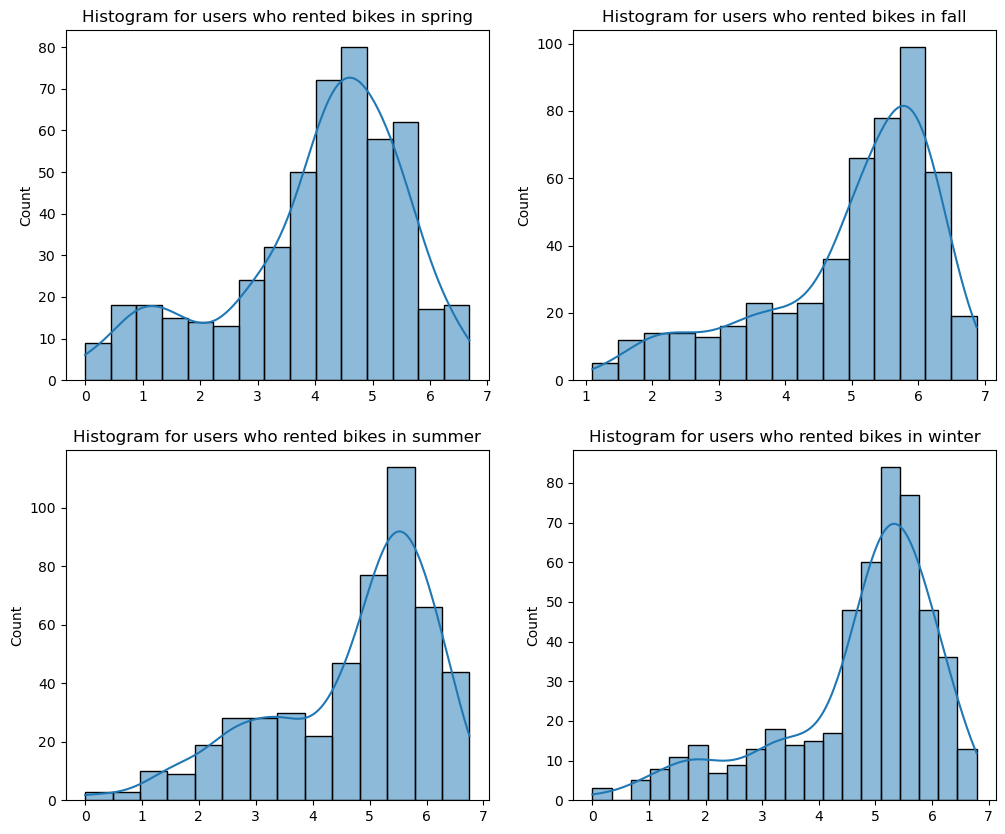

In [44]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(np.log(spring_sample),kde=True)
plt.title('Histogram for users who rented bikes in spring')
plt.subplot(2,2,2)
sns.histplot(np.log(fall_sample),kde=True)
plt.title('Histogram for users who rented bikes in fall')
plt.subplot(2,2,3)
sns.histplot(np.log(summer_sample),kde=True)
plt.title('Histogram for users who rented bikes in summer')
plt.subplot(2,2,4)
sns.histplot(np.log(winter_sample),kde=True)
plt.title('Histogram for users who rented bikes in winter')
plt.show()

This distribution is moreover symmetric appears to be approximate normal

### QQ plot test for the Normality

Text(0.5, 1.0, 'QQ plot for users who rented bikes in winter')

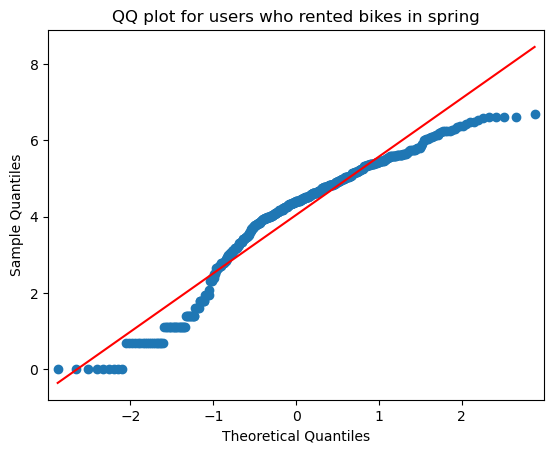

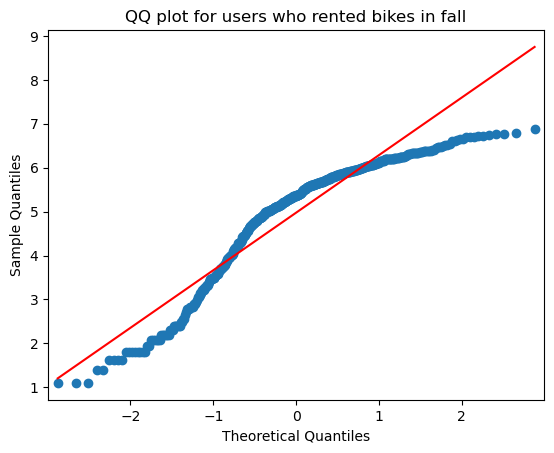

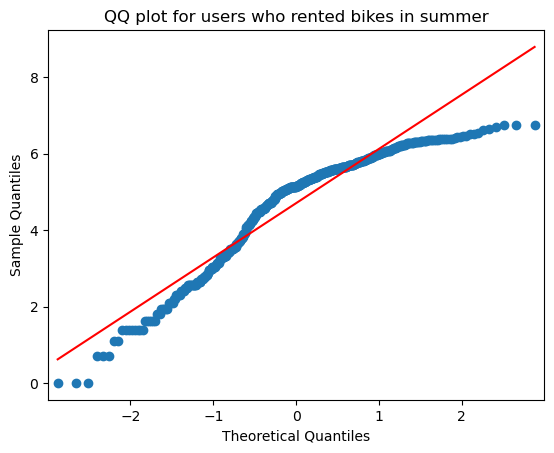

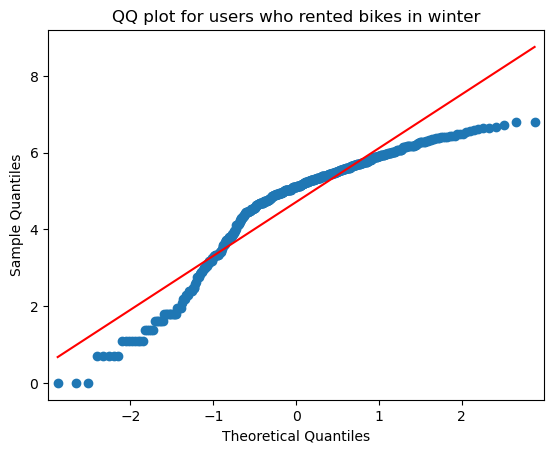

In [45]:
# Checking for normality of Fall season
sm.qqplot(np.log(spring_sample),line='s')
plt.title('QQ plot for users who rented bikes in spring')

sm.qqplot(np.log(fall_sample),line='s')
plt.title('QQ plot for users who rented bikes in fall')

sm.qqplot(np.log(summer_sample),line='s')
plt.title('QQ plot for users who rented bikes in summer')

sm.qqplot(np.log(winter_sample),line='s')
plt.title('QQ plot for users who rented bikes in winter')

`Conclusion`:-

1. `spring` - Most of the points are not in line so we can not conclude the normality of the Spring sample
2. `Fall` - Most of the points are not in line so we can not conclude the normality of the Fall sample
3. `summer` - Most of the points are not in line so we can not conclude the normality of the summer sample
4. `Winter` - Most of the points are not in line so we can not conclude the normality of the Winter sample


**Now for the Quantitative approach we wil use Shapiro–Wilk test**

### Shapiro–Wilk test for normality of Seasonsal data

#### Checking the normality for **spring data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The spring population has the normal distribution 
        * Ha = The spring population has the not normal distribution 

In [46]:
shapiro(np.log(spring_sample))

ShapiroResult(statistic=0.9272080063819885, pvalue=7.484527117540031e-15)

In [47]:
shapiro(spring_sample)

ShapiroResult(statistic=0.7663604021072388, pvalue=4.746162222888378e-26)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **spring Population is not normally distributed**.


******************************************************************************************************


#### Checking the normality for **fall data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The fall population has the normal distribution 
        * Ha = The fall population has the not normal distribution 

In [48]:
shapiro(np.log(fall_sample))

ShapiroResult(statistic=0.8881552219390869, pvalue=1.3878108547096974e-18)

In [49]:
shapiro(fall_sample)

ShapiroResult(statistic=0.9294459223747253, pvalue=1.3418101333273653e-14)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **fall Population is not normally distributed**.

******************************************************************************************************

#### Checking the normality for **summer data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The summer population has the normal distribution 
        * Ha = The summer population has the not normal distribution 

In [50]:
shapiro(np.log(summer_sample))

ShapiroResult(statistic=0.9050388336181641, pvalue=4.1497901017609236e-17)

In [51]:
shapiro(summer_sample)

ShapiroResult(statistic=0.9047476649284363, pvalue=3.8996596180755036e-17)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **summer Population is not normally distributed**.


******************************************************************************************************


#### Checking the normality for **Winter data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The winter population has the normal distribution 
        * Ha = The winter population has the not normal distribution 

In [52]:
shapiro(np.log(winter_sample))

ShapiroResult(statistic=0.8809313774108887, pvalue=3.633975812428614e-19)

In [53]:
shapiro(winter_sample)

ShapiroResult(statistic=0.8975244164466858, pvalue=8.700084677943895e-18)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **winter Population is not normally distributed**


### Assumption of normality ❌

### We will check the equivalence for the variance from the levene's test

 ##### Checking for equality of variance **spring,fall,summer,winter data**
 
 The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
   * -- We will select the Null Hypothesis and alternate Hypothesis
      * H0 = The variance for the all the seasonal population of rented bikes are equal
      * Ha = The variance for the all the seasonal population of rented bikes are  not equal
      

* we will select the significance level (alpha)=5%

In [54]:
# conducting the test
# we will use center as median beacause the samples are not normal they are right skewed
levene(spring_sample,fall_sample,winter_sample,summer_sample,center='median')

LeveneResult(statistic=30.50816930978606, pvalue=2.7906004878770227e-19)

In [55]:
#conducting the test
#we will use center as Mean beacause the log normal distribution is somwhere symmetric
levene(np.log(spring_sample),np.log(fall_sample),np.log(winter_sample),np.log(summer_sample),center='mean')

LeveneResult(statistic=3.290885073355881, pvalue=0.019878048153190414)

`Conclusion` :-

* from the about results we find the p value for this is test is higher than significance level.

* results are not statistically significant. thus we fail to reject the Null hypothesis i.e. `The variance for the non working day and working day population are equal` so we do not have enough data to reject the null hypothesis

* we conclude the `The variance for the non working day and working day population are equal` for now 
### Assumption 4 ✅

#### since the 3 assumptions from 4 are true 

### Performing the One-way -ANOVA test

 assuming significance level = 5% and setting up the null Hypothesis
   * H0 = season does not effect on the no of cycle rented ( mean(fall)=mean(summer)=mean(summer)=mean(winter)
   * Ha = Atleast one season type affects the no of cycle rented
    

In [56]:
f_oneway(fall_sample,spring_sample,winter_sample,summer_sample)

F_onewayResult(statistic=44.85610090928662, pvalue=4.75708926452001e-28)

`Conclusion:-`
1. since from the above results the (pvalue) < 0.05(significance level)  the We  reject the Null hypothesis.
## We do have sufficient evidence to conclude that at least 1 season type does affect the rented bikes. it does not conclude the exact season type.

### Performing the kruskal test because the all assumptions for ANOVA are not True

 assuming significance level = 5% and setting up the null Hypothesis
   * H0 = season does not effect on the no of cycle rented ( mean(fall)=mean(summer)=mean(summer)=mean(winter)
   * Ha = Atleast one season type affects the no of cycle rented

In [57]:
kruskal(fall_sample,spring_sample,winter_sample,summer_sample)

KruskalResult(statistic=142.74131870637305, pvalue=9.690419316451389e-31)

`Conclusion:-`
1. since from the above results the (pvalue) < 0.05(significance level)  the We  reject the Null hypothesis.
## We do have sufficient evidence to conclude that at least 1 season type does affect the rented bikes. it does not conclude the exact season type.

# Does Number of rented cycles is impacted by the various different weather

In [58]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since we have only 1 value in heavy rain / thunder strom data, we are not able to colculde of this effect
so we will excalde season type 4 i.e heavy rain thunder storm

### We will use On way ANOVA for this analysis

In [59]:
# Extrating the population data
weather1_data=df.loc[df['weather']==1]['count']
weather2_data=df.loc[df['weather']==2]['count']
weather3_data=df.loc[df['weather']==3]['count']

In [60]:
# taking the independent and random samples
weather1_sample=np.random.choice(weather1_data,size=500)
weather2_sample=np.random.choice(weather2_data,size=500)
weather3_sample=np.random.choice(weather3_data,size=500)

1. The Sampled data is Random = Assumption 4 ✅
2. The Sampled data is Independent = Assumption 3 ✅

- now we will check for the normality 

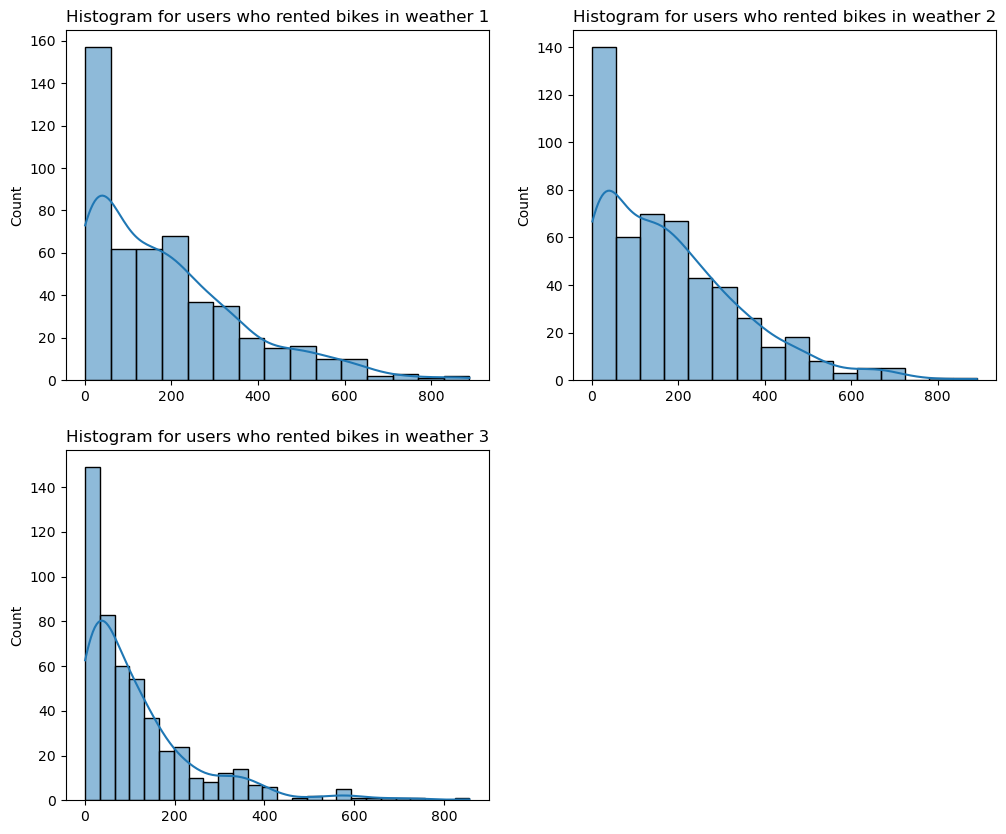

In [61]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(weather1_sample,kde=True)
plt.title('Histogram for users who rented bikes in weather 1')
plt.subplot(2,2,2)
sns.histplot(weather2_sample,kde=True)
plt.title('Histogram for users who rented bikes in weather 2')
plt.subplot(2,2,3)
sns.histplot(weather3_sample,kde=True)
plt.title('Histogram for users who rented bikes in weather 3')
plt.show()

The plot appears to be right-skewed since it is impossible to infer normality from the histogram.

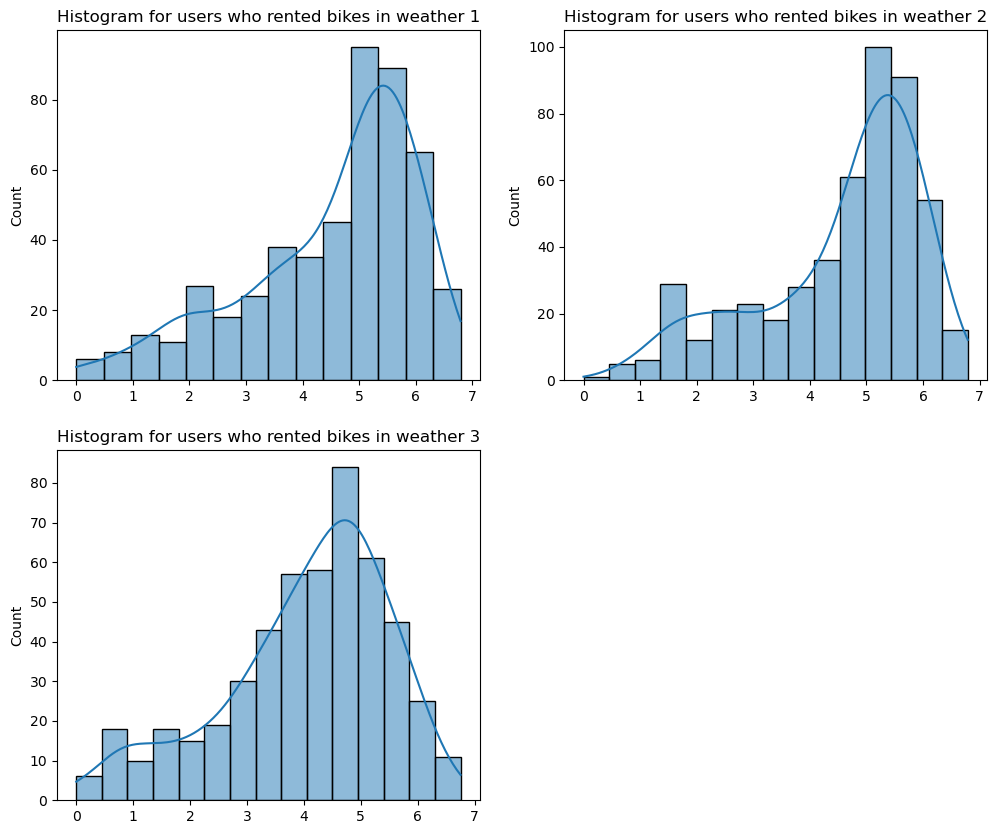

In [62]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(np.log(weather1_sample),kde=True)
plt.title('Histogram for users who rented bikes in weather 1')
plt.subplot(2,2,2)
sns.histplot(np.log(weather2_sample),kde=True)
plt.title('Histogram for users who rented bikes in weather 2')
plt.subplot(2,2,3)
sns.histplot(np.log(weather3_sample),kde=True)
plt.title('Histogram for users who rented bikes in weather 3')
plt.show()

We can assume that the distribution is approx log normal

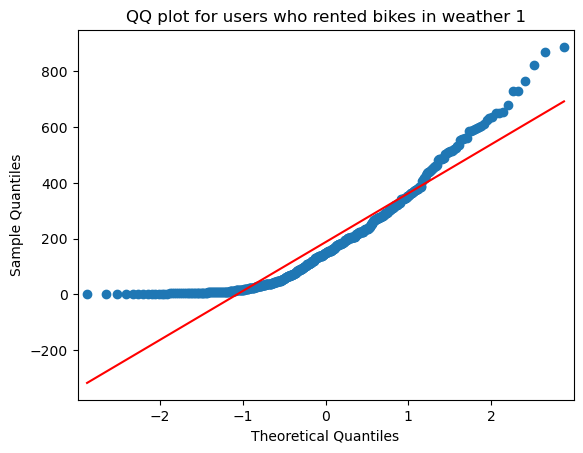

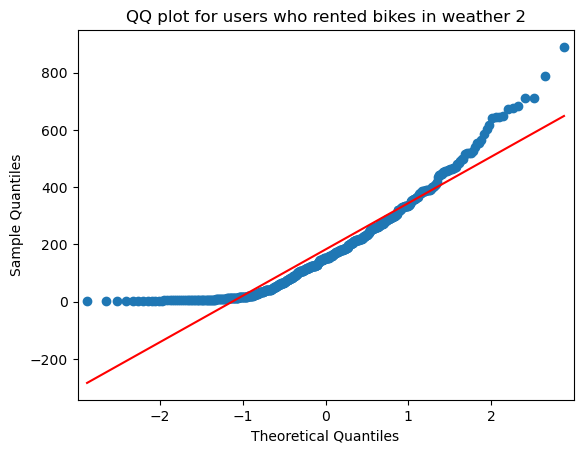

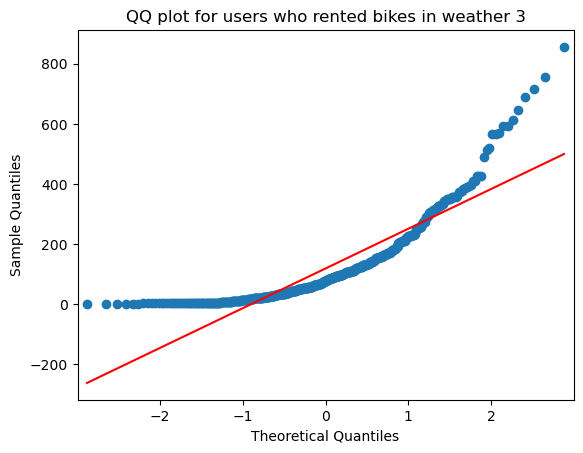

In [63]:
# Checking for normality of Fall season
sm.qqplot(weather1_sample,line='s')
plt.title('QQ plot for users who rented bikes in weather 1')

sm.qqplot(weather2_sample,line='s')
plt.title('QQ plot for users who rented bikes in weather 2')

sm.qqplot(weather3_sample,line='s')
plt.title('QQ plot for users who rented bikes in weather 3')

plt.show()

`Conclusion`:-

1. `weather 1` - Most of the points are not in line so we can not conclude the normality of the Spring sample
2. `weather 2` - Most of the points are not in line so we can not conclude the normality of the Fall sample
3. `weather 3` - Most of the points are not in line so we can not conclude the normality of the summer sample

**Now for the Quantitative approach we wil use Shapiro–Wilk test**

### Shapiro–Wilk test for normality of Weather data

### Checking the normality for **Weather 1 data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The weather 1 population has the normal distribution 
        * Ha = The weather 1 population has the not normal distribution 

In [64]:
shapiro(weather1_sample)

ShapiroResult(statistic=0.8836154341697693, pvalue=5.936126215161498e-19)

In [65]:
shapiro(np.log(weather1_sample))

ShapiroResult(statistic=0.9102045297622681, pvalue=1.2800152787648133e-16)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **weather1 Population is not normally distributed**.

### Checking the normality for **weather 2 data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The weather 2 population has the normal distribution 
        * Ha = The weather 2 population has the not normal distribution 

In [66]:
shapiro(weather2_sample)

ShapiroResult(statistic=0.8995631337165833, pvalue=1.3181046960416141e-17)

In [67]:
shapiro(np.log(weather2_sample))

ShapiroResult(statistic=0.8998693227767944, pvalue=1.40371904749371e-17)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **weather 2 Population is not normally distributed**.

### Checking the normality for **weather 3 data**
   * we will select the significance level (alpha)=5%
   * We will select the Null Hypothesis and alternate Hypothesis'
        * H0 = The weather 3 population has the normal distribution 
        * Ha = The weather 3 population has the not normal distribution 

In [68]:
shapiro(weather3_sample)

ShapiroResult(statistic=0.783983051776886, pvalue=3.4298935067101277e-25)

In [69]:
shapiro(np.log(weather3_sample))

ShapiroResult(statistic=0.9461254477500916, pvalue=1.6494359047006246e-12)

`Conclusion` :-
* According to the results, the p value for this test is extremely low and less than the level of significance.
* Thus, since we must reject the null hypothesis, the results are statistically significant. ... the evidence is sufficient to support the alternative hypothesis, which holds that **weather 3 Population is not normally distributed**.

### Assumption of normality ❌

### We will check the equivalence for the variance from the levene's test

 ##### Checking for equality of variance **weather1,weather2,and weather3**
 
 The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
   * We will select the Null Hypothesis and alternate Hypothesis
      * H0 = The variance for the all the weather population of rented bikes are equal
      * Ha = The variance for the all the weather population of rented bikes are  not equal
      

* we will select the significance level (alpha)=5%

In [70]:
# conducting the test
# we will use center as median beacause the samples are not normal they are right skewed
levene(weather1_sample,weather2_sample,weather3_sample,center='median')

LeveneResult(statistic=24.307304569009677, pvalue=4.085628256892293e-11)

In [71]:
# conducting the test
# we will use center as median beacause the samples are not normal they are right skewed
levene(np.log(weather1_sample),np.log(weather2_sample),np.log(weather3_sample),center='mean')

LeveneResult(statistic=1.2140742975557963, pvalue=0.29727705175774716)

`Conclusion` :-

* from the about results we find the p value for this is test is higher than significance level.

* results are not statistically significant. thus we fail to reject the Null hypothesis i.e. `The variance for the non working day and working day population are equal` so we do not have enough data to reject the null hypothesis

* we conclude the `The variance for the non working day and working day population are equal` for now 
### `Assumption 4 ✅

### Performing the One-way -ANOVA test

 assuming significance level = 5% and setting up the null Hypothesis
   * H0 = weather does not effect on the no of cycle rented 
     - (mean(weather 1)=mean(weather 2)=mean(weather 3))
   * Ha = Atleast one weather type affects the no of cycle rented
    

In [72]:
f_oneway(weather1_sample,weather2_sample,weather3_sample)

F_onewayResult(statistic=29.342679804548442, pvalue=3.162836415337334e-13)

`Conclusion:-`
1. since from the above results the (pvalue) < 0.05(significance level)  the We  reject the Null hypothesis.
## We do have sufficient evidence to conclude that at least 1 Weather type does affect the rented bikes. it does not conclude the exact season type.

### Performing the kruskal test because the all assumptions for ANOVA are not True

 assuming significance level = 5% and setting up the null Hypothesis
   * H0 = weather does not effect on the no of cycle rented 
     - (mean(weather 1)=mean(weather 2)=mean(weather 3))
   * Ha = Atleast one weather type affects the no of cycle rented


In [73]:
kruskal(weather1_sample,weather2_sample,weather3_sample)

KruskalResult(statistic=56.286414573813886, pvalue=5.991842267474098e-13)

`Conclusion:-`
1. since from the above results the (pvalue) < 0.05(significance level)  the We  reject the Null hypothesis.
## We do have sufficient evidence to conclude that at least 1 Weather type does affect the rented bikes. it does not conclude the exact season type.

************************

****************************

# Is Weather Type Dependent on Season

- This is the categorical and catrgorical relation
#### for these type of problems we choose chi_square test of independence

Chi_square test of independence=A test of independence determines whether two factors are independent or not.

Distribution of the χ2-Statistic for a Chi-Square Independence Test:-
   * For a chi-square independence test, the test statistic χ2 = (O− E)2/E has approximately a chi-square distribution if the null hypothesis of non association is true. 
   
   where O = observed Value , E= Expected Value
   
   * The number of degrees of freedom is (r − 1)(c − 1), where r and c are the number of possible values for the two variables under consideration.
   
We will setup the null and alternate Hypothesis
   * H0 = The weather and season are independent on each other 
   * Ha = The weather and season are dependent on each other 
   
we assume the significance level = 5%

Assumption of Chi-Square Independence Test:-
   1. `Variables are Categorical ` - as both weather and season are categories as Assumption 1 =✅ 
 
   2. `Observation are independent` - it is to assume Assumption 3 =✅ 
   3. `Each cell is mutually exclusive ` - Assuming survey has been finished in on time Assumption 2 =✅ 
   4.  All expected frequencies are 1 or greater as well as At least 80% of the expected frequencies are greater than 5

In [74]:
season_weather=pd.crosstab(df['weather'],df['season'])
season_weather

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [75]:
test_stat,p_value,dff,expected = chi2_contingency(season_weather)

In [76]:
np.around(expected,decimals=4)

array([[1.8055976e+03, 1.7745464e+03, 1.8055976e+03, 1.8062583e+03],
       [7.1149380e+02, 6.9925810e+02, 7.1149380e+02, 7.1175420e+02],
       [2.1565740e+02, 2.1194870e+02, 2.1565740e+02, 2.1573640e+02],
       [2.5110000e-01, 2.4670000e-01, 2.5110000e-01, 2.5110000e-01]])

since the expected Values in last rows are less then 1 therefor assumption 4 is not proved but
for further procedure we will remove the last row and analyze further

In [77]:
df_new=df.loc[~(df['weather']==4)]

In [78]:
# removed and created a new contigencey table excludin the weather type 4
season_weather_new=pd.crosstab(df_new['weather'],df_new['season'])
season_weather_new

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225


In [79]:
test_stat,p_value,dff,expected = chi2_contingency(season_weather_new)

In [80]:
expected

array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
       [ 711.55920992,  699.06201194,  711.55920992,  711.81956821],
       [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823]])

* Now the expected values in each cell are >5 so Assumption 4 ✅

In [81]:
p_value

2.8260014509929403e-08

 - As the all 4 assumption are Validated.
- and p value = 0.0000000282 < 0.05(significance level) so we reject the null Hypothesis
    ### The data is statistically significant to reject the independency the weather and season.Thus we conclude that the season and weather are dependent Factors

## Recommendation:-
1. Most no of rented bikes are in fall season and then summer season. its verified with ANOVA and kruskal test 
2. Clear, Few clouds, partly cloudy, partly cloudy  attracts the most rented users. = 71% 
3. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather with 2nd most = 25%. confirmed with ANOVA and Kruskal test.
4. almost 85% of bike rental are below the speed 20 kmph.
5. Working day does not affect for rented bikes Confirmed with two sample t test